In [265]:
import spike.spike_analysis.spike_collection as sc
import spike.spike_analysis.spike_recording as sr
import spike.spike_analysis.firing_rate_calculations as fr
import spike.spike_analysis.normalization as norm
import spike.spike_analysis.single_cell as single_cell
import spike.spike_analysis.spike_collection as collection
import spike.spike_analysis.zscoring as zscoring
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import behavior.boris_extraction as boris
import matplotlib.pyplot as plt
import pickle
import re

In [266]:
pd.set_option('display.max_colwidth', 0)  # 0 means unlimited in newer pandas versions

# Show all rows
pd.set_option("display.max_rows", None)

# Show all columns
pd.set_option("display.max_columns", None)

# Don’t truncate column contents
pd.set_option("display.max_colwidth", None)

# Expand the display to the full width of the screen
pd.set_option("display.width", 0)


In [267]:
spike_collection_json_path = r'C:\Users\thoma\Code\ResearchCode\diff_fam_social_memory_ephys\spike_collection.json\spike_collection.json'

In [268]:
import importlib
importlib.reload(sc)
importlib.reload(zscoring)

<module 'spike.spike_analysis.zscoring' from 'c:\\Users\\thoma\\Code\\ResearchCode\\diff_fam_social_memory_ephys\\spike\\spike_analysis\\zscoring.py'>

In [269]:
sp = sc.SpikeCollection.load_collection(spike_collection_json_path)

In [270]:
rec_events = sp.recordings[0].event_dict

# get unique event names from rec_events dictionary
event_names = list(rec_events.keys())
print("Unique event names:", event_names)

Unique event names: ['alone_rewarded', 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose', 'high_comp_lose_baseline', 'high_comp_win', 'high_comp_win_baseline', 'lose', 'low_comp', 'low_comp_lose', 'low_comp_lose_baseline', 'low_comp_win', 'low_comp_win_baseline', 'overall_pretone', 'win']


In [271]:
exclude_events_baseline_alone_rewarded = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

In [272]:
exclude_events_baseline = [ 'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone', 'alone_rewarded']

In [273]:
win_lose = ['win', 'lose']

In [274]:
# for each rec, what makes up the percentages of win or lose events
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k in win_lose)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k in win_lose}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()


Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: lose, Percentage: 65.00%
  Event: win, Percentage: 35.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: lose, Percentage: 35.00%
  Event: win, Percentage: 65.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
  Event: lose, Percentage: 5.00%
  Event: win, Percentage: 95.00%

Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
  Event: lose, Percentage: 95.00%
  Event: win, Percentage: 5.00%

Recording: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_b

In [275]:
# for each rec, what makes up the percentages of events? not including those in exclude_events_baseline
event_name_counts = {}
for rec in sp.recordings:
    event_dict = rec.event_dict
    total_events = sum(len(v) for k, v in event_dict.items() if k not in exclude_events_baseline)
    event_name_counts[rec.name] = {k: len(v) for k, v in event_dict.items() if k not in exclude_events_baseline}
    event_name_counts[rec.name]['total'] = total_events

# Calculate percentages
event_name_percentages = {}
for rec_name, counts in event_name_counts.items():
    event_name_percentages[rec_name] = {k: (v / counts['total'] * 100) if counts['total'] > 0 else 0
                                         for k, v in counts.items() if k != 'total'}
# Display results
for rec_name, percentages in event_name_percentages.items():
    print(f"Recording: {rec_name}")
    for event_name, percentage in percentages.items():
        print(f"  Event: {event_name}, Percentage: {percentage:.2f}%")
    print()

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 5.00%
  Event: high_comp_win, Percentage: 40.00%
  Event: low_comp_lose, Percentage: 30.00%
  Event: low_comp_win, Percentage: 25.00%

Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 40.00%
  Event: high_comp_win, Percentage: 5.00%
  Event: low_comp_lose, Percentage: 25.00%
  Event: low_comp_win, Percentage: 30.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
  Event: high_comp_lose, Percentage: 50.00%
  Event: high_comp_win, Percentage: 20.00%
  Event: low_comp_lose, Percentage: 15.00%
  Event: low_comp_win, Percentage: 15.00%

Recording: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
  Event: high_comp_lose, Percentage: 20.00%
  Event: high_comp_win, Percentage: 50.00%
  Event: low_comp_lose, Percentage: 15.00%
  Eve

In [276]:
i = 0
for rec in sp.recordings:
    i+=1
    print(f"{i}: {rec.name}")

1: 20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec
2: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
3: 20230612_112630_standard_comp_to_training_D1_subj_1-1_t1b3L_box2_merged.rec
4: 20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec
5: 20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec
6: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec
7: 20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec
8: 20230614_114041_standard_comp_to_training_D3_subj_1-2_t2b2L_box2_merged.rec
9: 20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec
10: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
11: 20230617_115521_standard_comp_to_omission_D1_subj_1-1_t1b3L_box1_merged.rec
12: 20230617_115521_standard_comp_to_omission_D1_subj_1-2_t2b2L_box2_merged.rec
13: 20230618_100636_standard_comp_to_omission_D2_

## PSTH, Specific Event.
-Finds Bins across all events of it's event type, finds mean and std across all of these bins

Best for examining dynamics within the event window

In [277]:
def run_zscore_event_specific_baseline(recording, event_name, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using an event-specific baseline per unit.
    This function calculates the z-score of firing rates for a specific event type
    based on a baseline computed from the pre-event windows of that event type only.
    Uses a PSTH-like approach: averages across trials per timebin, then across timebins.
    
    Parameters:
    - recording: SpikeRecording object containing spike data and events.
    - event_name: Name of the event type to analyze.
    - pre_window: Duration in seconds before the event to use for baseline calculation.
    - equalize: Duration in seconds of the event window to analyze.
    - timebin: Duration in seconds of each timebin for firing rate calculations (default 0.25s = 250ms).
    - SD: Number of standard deviations to use for significance thresholding.
    - verbose: If True, prints additional information during processing.
    
    Returns:
    - A pandas DataFrame containing the z-scores and significance of firing rates for each unit
      for the specified event type, along with baseline and event means and standard deviations.
    """
    # Step 1: Initialize units and baseline/event firing rates
    units = getattr(recording, "good_units", None)  # Get good units if available
    if units is None:  # If not, use labels_dict
        units = [unit_id for unit_id, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict to determine good units.")
            print(f"Good units found: {units}\nFrom labels_dict: {recording.labels_dict}\n")

    # Initialize dictionaries for baseline and event firing rate matrices (list of arrays per unit)
    baseline_fr_matrices = {unit_id: [] for unit_id in units}
    event_fr_matrices = {unit_id: [] for unit_id in units}

    # Convert timebin and sampling rate to milliseconds for consistency
    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # Step 2: Compute firing rates for baseline and event windows per trial
    event_windows = recording.event_dict[event_name]
    for unit_id in units:
        spikes = recording.unit_timestamps[unit_id]  # Array of spike timestamps in samples
        spikes_ms = spikes * (1000 / sampling_rate)  # Convert to milliseconds

        for window in event_windows:
            start_event = window[0]  # Event start in ms
            end_event = min(window[1], start_event + equalize * 1000)  # Event end, trimmed to equalize duration
            start_baseline = start_event - int(pre_window * 1000)  # Baseline start in ms
            end_baseline = start_event  # Baseline ends at event onset

            # Calculate baseline firing rates (in timebins)
            baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)  # Include end for full coverage
            baseline_spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
            baseline_firing_rate = baseline_spike_counts * (1000 / timebin_ms)  # Convert to Hz
            baseline_fr_matrices[unit_id].append(baseline_firing_rate)

            # Calculate event firing rates (in timebins)
            event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)  # Include end for full coverage
            event_spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
            event_firing_rate = event_spike_counts * (1000 / timebin_ms)  # Convert to Hz
            event_fr_matrices[unit_id].append(event_firing_rate)

            #if verbose:
                #print(f"Unit {unit_id}, Event {event_name}, Window {window}")
                #print(f"Baseline firing rates: {baseline_firing_rate}")
                #print(f"Event firing rates: {event_firing_rate}\n")

    # Step 3: Compute mean and SD for baseline and event per unit using PSTH-like averaging
    rows = []
    for unit_id in units:
        # Convert lists to numpy arrays (shape: num_trials x num_bins)
        baseline_fr_matrix = np.array(baseline_fr_matrices[unit_id])

        # printing out whole matrix if verbose
        if verbose:
            print(f"Event name: {event_name}")
            print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
            print(f"Baseline FR matrix for unit {unit_id}:\n{baseline_fr_matrix}\n")

        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
        else:
            # Check for consistent bin counts across trials
            if len(set(len(row) for row in baseline_fr_matrices[unit_id])) > 1:
                raise ValueError(f"Inconsistent baseline bin counts for unit {unit_id}")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                raise ValueError(f"Inconsistent event bin counts for unit {unit_id}")

            # Baseline: mean per bin across trials, then overall mean across bins
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan

            # Baseline SD: SD per bin across trials, then mean SD across bins
            # b_sd_per_bin = np.std(baseline_fr_matrix, axis=0, ddof=1)  # Use ddof=1 for sample std
            # b_sd = np.mean(b_sd_per_bin) if len(b_sd_per_bin) > 0 else np.nan
            # b_sd = np.std(b_mean_per_bin, ddof=1) if len(b_mean_per_bin) > 1 else np.nan

            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.mean(b_var_per_bin) if len(b_var_per_bin) > 0 else np.nan

            # Event: mean per bin across trials, then overall mean across bins
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

            # Calculate z-score
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        # Append results to rows
        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Pre-event M": b_mean,
            "Pre-event SD": b_sd,
            "Event M": ev_mean,
            "Event Z-Score": zscore,
        })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # Step 4: Apply significance threshold
    conditions = [
        (df['Event Z-Score'] > SD),
        (df['Event Z-Score'] < -SD)
    ]
    values = ['increase', 'decrease']
    df['sig'] = np.select(conditions, values, default='not sig')

    return df

In [278]:
import pandas as pd

def run_all_recordings_all_events_event_specific(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Run Z-score analysis with event-specific baselines for all recordings and all event types.
    
    Parameters:
    - sp: SpikeAnalysis_MultiRecording object containing a list of recordings.
    - pre_window: Duration in seconds before the event for baseline calculation (default 10).
    - equalize: Duration in seconds of the event window to analyze (default 10).
    - timebin: Duration in serun_zscore_event_specific_baselinconds of each timebin for firing rate calculations (default 0.25s = 250ms).
    - SD: Number of standard deviations for significance thresholding (default 1.65).
    - verbose: If True, prints additional information during processing.
    
    Returns:
    - big_df: A pandas DataFrame concatenating Z-score results for all recordings and events.
    - skipped: A pandas DataFrame listing recordings/events that were skipped and why.
    """
    # Get union of event names across all recordings
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []
    
    if verbose:
        print(f"All event names: {all_event_names}")

    # Iterate through each recording
    for rec in sp.recordings:

        # Iterate through each event type
        for ev in all_event_names:
            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                if verbose:
                    print(f"[INFO] Skipping {rec.name} / {ev}: no windows")
                continue

            try:
                # Run Z-score calculation with event-specific baseline
                df_ev = run_zscore_event_specific_baseline(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    equalize=equalize,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                
                if not df_ev.empty:
                    # Add metadata for number of event windows
                    df_ev["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df_ev)
                    if verbose:
                        print(f"[INFO] Processed {rec.name} / {ev}: {len(df_ev)} units")
                else:
                    skipped.append((rec.name, ev, "empty result"))
                    if verbose:
                        print(f"[INFO] Skipping {rec.name} / {ev}: empty result")
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))
                if verbose:
                    print(f"[WARN] {rec.name} / {ev} -> {e}")

    # Concatenate all DataFrames
    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    
    return big_df, skipped_df

In [279]:
specific_event_df, skipped = run_all_recordings_all_events_event_specific(sp, pre_window=10, SD=1.65, verbose=False)
print(f"big_df shape: {specific_event_df.shape}")
print("Skipped counts:", skipped.shape[0])
print(f"# sig: {specific_event_df['sig'].value_counts()}")

specific_event_df.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_event_specific.csv",
    index=False
)


c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\numpy\_core\_methods.py:212: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\numpy\_core\_methods.py:212: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\thoma\miniconda3\envs\ephys_env\lib\site-packages\numpy\_core\fromnumeric.py:4268: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\thoma\miniconda3\envs\ephys

big_df shape: (6677, 9)
Skipped counts: 228
# sig: sig
not sig     6634
increase      43
Name: count, dtype: int64


In [280]:
specific_event_df['sig'].value_counts()

sig
not sig     6634
increase      43
Name: count, dtype: int64

In [281]:
sig_specific_event_df = specific_event_df[specific_event_df['sig'] != 'not sig']

In [282]:
hcw = sig_specific_event_df.query('''`Event name` == 'high_comp_win' ''')
len(hcw)

2

In [283]:
lcw = sig_specific_event_df.query("`Event name` == 'low_comp_win'")
len(lcw)

7

In [284]:
hcl = sig_specific_event_df.query('''`Event name` == 'high_comp_lose' ''')
len(hcl)

4

In [285]:
lcl = sig_specific_event_df.query('''`Event name` == 'low_comp_lose' ''')
len(lcl)

0

In [286]:
win = sig_specific_event_df.query('''`Event name` == 'win' ''')
len(win)

6

In [287]:
lose = sig_specific_event_df.query('''`Event name` == 'lose' ''')
len(lose)

4

In [288]:
dec_sig = sig_specific_event_df[sig_specific_event_df['sig'] == 'decrease']
dec_sig.head()

Empty DataFrame
Columns: [Recording, Event name, Unit number, Pre-event M, Pre-event SD, Event M, Event Z-Score, sig, Event windows]
Index: []

In [289]:
# find number of significant neurons per event
sig_counts = sig_specific_event_df.groupby(['Event name', 'sig']).size().unstack()
sig_counts.head(20)

sig                      increase
Event name                       
alone_rewarded                  7
alone_rewarded_baseline         1
high_comp                       1
high_comp_lose                  4
high_comp_lose_baseline         1
high_comp_tie                   2
high_comp_win                   2
high_comp_win_baseline          1
lose                            4
low_comp                        4
low_comp_lose_baseline          1
low_comp_win                    7
low_comp_win_baseline           1
overall_pretone                 1
win                             6

In [290]:
# print out sig counts for each event
print(f"{sig_counts}")

sig                      increase
Event name                       
alone_rewarded                  7
alone_rewarded_baseline         1
high_comp                       1
high_comp_lose                  4
high_comp_lose_baseline         1
high_comp_tie                   2
high_comp_win                   2
high_comp_win_baseline          1
lose                            4
low_comp                        4
low_comp_lose_baseline          1
low_comp_win                    7
low_comp_win_baseline           1
overall_pretone                 1
win                             6


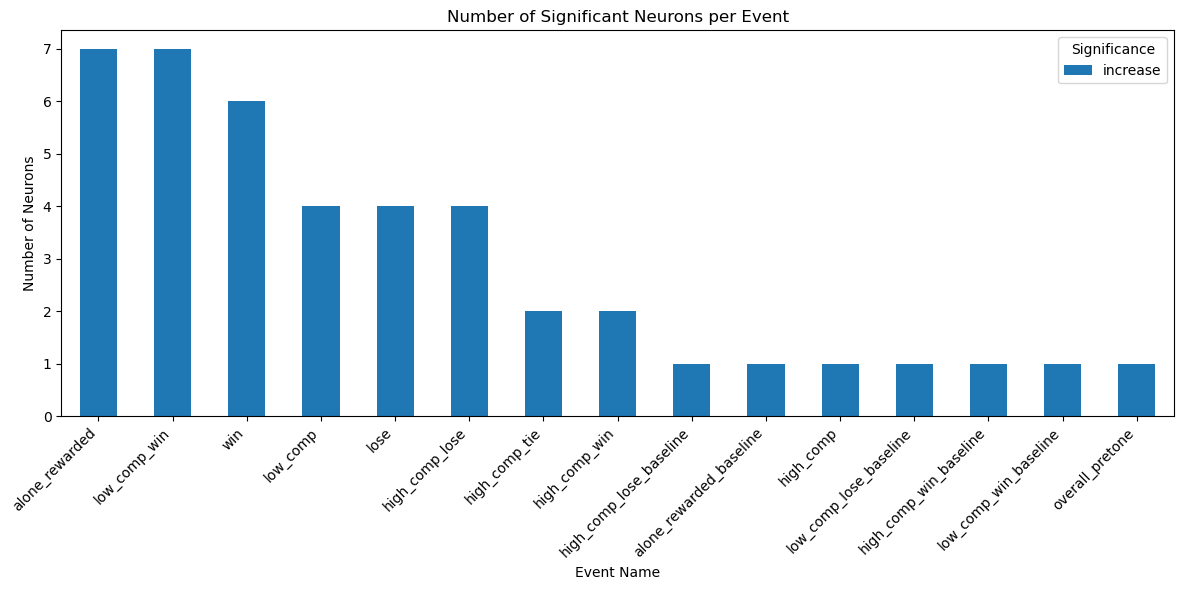

In [291]:
# bar plot from most increasing to least increasing significant neurons per event
import matplotlib.pyplot as plt
sig_counts_sorted = sig_counts.sort_values(by='increase', ascending=False)
sig_counts_sorted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Significant Neurons per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Neurons')
plt.legend(title='Significance', loc='upper right')
# make the xlabels horizontal
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



# Global PSTH

In [ ]:
import numpy as np
import pandas as pd

def run_zscore_global_baseline_psth(recording, event_name, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using a global pooled baseline per unit with PSTH-like averaging.
    Computes baseline across all non-excluded events, averaging across trials per timebin, then across timebins.
    Event firing rates are similarly averaged using PSTH method.

    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before events to use for baseline extraction.
    equalize : float
        Duration (s) of event window to analyze.
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based event rates.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    global_baseline_matrices = {u: [] for u in units}

    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                baseline_bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=baseline_bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

                if verbose:
                    print(f"[{recording.name}] Unit {unit_id} | Baseline Event {ev_type}, Window {w}")
                    print(f"Baseline firing rates: {firing_rate}\n")

    # --- Step 3: Compute EVENT firing rates (PSTH-like) ---
    event_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]

    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            start_event = w[0]
            end_event = min(w[1], start_event + equalize * 1000)
            event_bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=event_bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)

            if verbose:
                print(f"[{recording.name}] Unit {unit_id} | Event {event_name}, Window {w}")
                print(f"Event firing rates: {firing_rate}\n")

    # --- Step 4: Compute mean and SD for baseline and event per unit ---
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])  # Shape: trials × bins
        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if verbose:
            print(f"Event name: {event_name}")
            print(f"Baseline FR matrix shape for unit {unit_id}: {baseline_fr_matrix.shape}")
            print(f"Baseline FR matrix for unit {unit_id}:\n{baseline_fr_matrix}\n")
            print(f"Event FR matrix shape for unit {unit_id}: {event_fr_matrix.shape}")
            print(f"Event FR matrix for unit {unit_id}:\n{event_fr_matrix}\n")

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
        else:
            # Handle inconsistent bin counts by trimming to shortest
            if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming baseline matrix for unit {unit_id} to {min_bins} bins")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                event_fr_matrix = event_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming event matrix for unit {unit_id} to {min_bins} bins")

            # Baseline mean: mean across trials per bin, then mean across bins
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan

            # Baseline SD: SD across trials per bin, then mean across bins
            
            # b_sd_per_bin = np.std(baseline_fr_matrix, axis=0, ddof=1)
            # b_sd = np.mean(b_sd_per_bin) if len(b_sd_per_bin) > 0 else np.nan

            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.sqrt(np.mean(b_var_per_bin))   # pooled across bins


            # Event mean: mean across trials per bin, then mean across bins
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan

            # Z-score
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-event M": b_mean,
            "Global Pre-event SD": b_sd,
            "Event M": ev_mean,
            "Event Z-Score": zscore,
        })

    # Create DataFrame
    df = pd.DataFrame(rows)

    # --- Step 5: Significance threshold ---
    df["sig"] = np.select(
        [df["Event Z-Score"] > SD, df["Event Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )

    return df

In [293]:
# Example usage with the wrapper function
def run_all_recordings_all_events_global_psth(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:

            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
            try:
                df_ev = run_zscore_global_baseline_psth(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    equalize=equalize,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df_ev.empty:
                    df_ev["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df_ev)
                else:
                    skipped.append((rec.name, ev, "empty result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {e}"))

    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])
    return big_df, skipped_df

# Run the analysis
big_df, skipped = run_all_recordings_all_events_global_psth(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False)
print(f"big_df shape: {big_df.shape}")
print(f"Skipped counts: {skipped.shape[0]}")
print(f"# sig: {big_df['sig'].value_counts()}")

big_df.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline.csv",
    index=False
)


big_df shape: (6677, 9)
Skipped counts: 228
# sig: sig
not sig     6614
increase      63
Name: count, dtype: int64


In [376]:
big_df.head()

Recording  \
0  20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec   
1  20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec   
2  20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec   
3  20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec   
4  20230612_101430_standard_comp_to_training_D1_subj_1-3_t3b3L_box2_merged.rec   

       Event name Unit number  Global Pre-event M  Global Pre-event SD  \
0  alone_rewarded         104            0.093333             0.675813   
1  alone_rewarded          11            0.436667             1.733876   
2  alone_rewarded         122            0.053333             0.486194   
3  alone_rewarded         125            0.708333             2.031920   
4  alone_rewarded         126            3.223333             5.619800   

   Event M  Event Z-Score      sig  Event windows  
0    0.075      -0.027128  not sig             40  
1    0.270      -0.096124  not sig             40  
2    0.185       0.270811  not sig             40  
3    0.690      -0.009023  not sig             40  
4    3.215      -0.001483  not sig             40

In [294]:
big_df['sig'].value_counts()

sig
not sig     6614
increase      63
Name: count, dtype: int64

In [295]:
global_sig = big_df[big_df['sig'] != 'not sig']

In [377]:
al_r = global_sig.query('''`Event name` == 'alone_rewarded' ''')
al_r.head(8)

Recording  \
336   20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec   
339   20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec   
1126  20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec   
1135  20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec   
2578  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2579  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2583  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2586  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   

          Event name Unit number  Global Pre-event M  Global Pre-event SD  \
336   alone_rewarded          52            0.598333             2.049638   
339   alone_rewarded          68            0.025000             0.368996   
1126  alone_rewarded         107            0.451667             1.487917   
1135  alone_rewarded         190            0.005000             0.140620   
2578  alone_rewarded         104            0.150847             0.861271   
2579  alone_rewarded         108            0.359322             1.580640   
2583  alone_rewarded          23            0.301695             1.493019   
2586  alone_rewarded          64            0.693220             1.762921   

       Event M  Event Z-Score       sig  Event windows  
336   4.370000       1.840162  increase             40  
339   1.030000       2.723605  increase             40  
1126  7.190000       4.528701  increase             40  
1135  0.470000       3.306782  increase             40  
2578  1.689744       1.786773  increase             39  
2579  7.179487       4.314813  increase             39  
2583  3.630769       2.229760  increase             39  
2586  3.707692       1.709930  increase             39

In [378]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
hcw_global.head(7)

Recording  \
386   20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec   
2653  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2654  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2658  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
5678                          20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec   
5692                          20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec   
6127                          20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec   

         Event name Unit number  Global Pre-event M  Global Pre-event SD  \
386   high_comp_win          52            0.598333             2.049638   
2653  high_comp_win         104            0.150847             0.861271   
2654  high_comp_win         108            0.359322             1.580640   
2658  high_comp_win          23            0.301695             1.493019   
5678  high_comp_win         101            2.646032             4.997224   
5692  high_comp_win          89            2.246032             4.488365   
6127  high_comp_win           4           25.688889            13.129510   

      Event M  Event Z-Score       sig  Event windows  
386       5.7       2.489057  increase              1  
2653      1.7       1.798681  increase              1  
2654      5.9       3.505339  increase              1  
2658      4.9       3.079870  increase              1  
5678     12.3       1.931866  increase              1  
5692     10.3       1.794410  increase              1  
6127     47.4       1.653612  increase              1

In [379]:
lcw_global = global_sig.query("`Event name` == 'low_comp_win'")
lcw_global.head(6)

Recording  \
446   20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec   
449   20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec   
2744  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
2748  20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec   
3535  20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec   
6612                          20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec   

        Event name Unit number  Global Pre-event M  Global Pre-event SD  \
446   low_comp_win          52            0.598333             2.049638   
449   low_comp_win          68            0.025000             0.368996   
2744  low_comp_win         108            0.359322             1.580640   
2748  low_comp_win          23            0.301695             1.493019   
3535  low_comp_win         187            0.963158             2.450922   
6612  low_comp_win          24            1.851667             4.875825   

        Event M  Event Z-Score       sig  Event windows  
446    4.800000       2.049955  increase              6  
449    0.983333       2.597136  increase              6  
2744   5.740000       3.404114  increase              5  
2748   2.960000       1.780490  increase              5  
3535   5.575000       1.881677  increase              4  
6612  10.400000       1.753207  increase              3

In [381]:
hcl_global = global_sig.query('''`Event name` == 'high_comp_lose' ''')
hcl_global.head(9)

Recording  \
767   20230612_112630_standard_comp_to_training_D1_subj_1-2_t2b2L_box1_merged.rec   
1200  20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec   
2356  20230616_111904_standard_comp_to_training_D4_subj_1-2_t2b2L_box2_merged.rec   
3463  20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec   
3474  20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L_box2_merged.rec   
3869  20230621_111240_standard_comp_to_omission_D5_subj_1-4_t3b3L_box1_merged.rec   
5772                          20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec   
5773                          20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec   
6296                          20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec   

          Event name Unit number  Global Pre-event M  Global Pre-event SD  \
767   high_comp_lose          14            7.280000             9.252650   
1200  high_comp_lose         107            0.451667             1.487917   
2356  high_comp_lose         180            0.672881             2.137145   
3463  high_comp_lose         187            0.963158             2.450922   
3474  high_comp_lose         275            0.315789             1.338586   
3869  high_comp_lose          84            1.315000             2.981169   
5772  high_comp_lose          49            0.301587             1.564061   
5773  high_comp_lose           8            7.331746             7.900521   
6296  high_comp_lose           7            0.431746             1.700456   

        Event M  Event Z-Score       sig  Event windows  
767   25.800000       2.001589  increase              4  
1200   4.254545       2.555840  increase             11  
2356   5.600000       2.305468  increase              1  
3463   5.283333       1.762674  increase             12  
3474   2.641667       1.737563  increase             12  
3869   7.930000       2.218928  increase             10  
5772   3.200000       1.853132  increase              1  
5773  20.600000       1.679415  increase              1  
6296   3.600000       1.863179  increase              1

In [382]:
lcl_global = global_sig.query('''`Event name` == 'low_comp_lose' ''')
lcl_global.head(5)

Recording  \
1088  20230613_105657_standard_comp_to_training_D2_subj_1-1_t1b2L_box1_merged.rec   
1709  20230614_114041_standard_comp_to_training_D3_subj_1-1_t1b3L_box1_merged.rec   
6356                          20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec   
6358                          20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec   
6359                          20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec   

         Event name Unit number  Global Pre-event M  Global Pre-event SD  \
1088  low_comp_lose         479            0.605000             1.801161   
1709  low_comp_lose         229            0.394828             1.432954   
6356  low_comp_lose           3            6.565079             5.945649   
6358  low_comp_lose           4           12.893651             8.184909   
6359  low_comp_lose           7            0.431746             1.700456   

      Event M  Event Z-Score       sig  Event windows  
1088      4.9       2.384573  increase              1  
1709      4.7       3.004404  increase              1  
6356     19.2       2.125070  increase              1  
6358     32.1       2.346556  increase              1  
6359     13.7       7.802761  increase              1

In [311]:
excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
len(excluded_sig)

38

In [371]:
# showing number of significant units per event
sig_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_counts.head(20)

# print out sig counts for each event
print(f"{sig_counts}")

sig                      increase
Event name                       
alone_rewarded                  8
alone_rewarded_baseline         1
high_comp                       4
high_comp_lose                  9
high_comp_lose_baseline         1
high_comp_tie                   3
high_comp_win                   7
high_comp_win_baseline          1
lose                            6
low_comp                        2
low_comp_lose                   5
low_comp_lose_baseline          1
low_comp_win                    6
low_comp_win_baseline           1
overall_pretone                 1
win                             7


In [368]:
excluded_sig_specific = sig_specific_event_df[~sig_specific_event_df['Event name'].isin(exclude_events_baseline_alone_rewarded)]
print("Total neurons (event-specific baseline, excluded events):", len(excluded_sig_specific))
print(f"Unique neurons: {excluded_sig_specific['Recording'].nunique()} recordings, {excluded_sig_specific['Unit number'].nunique()} units")

Total neurons (event-specific baseline, excluded events): 22
Unique neurons: 13 recordings, 19 units


In [366]:
# Explanation of the difference between 38 and 27 neurons
print("=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===")
print()

excluded_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]
print(f"Total neuron-event combinations (rows): {len(excluded_sig)}")
print(f"Unique neurons across all recordings: {excluded_sig['Unit number'].nunique()}")
print()

# Show how many times each neuron appears (i.e., significant for multiple events)
neuron_event_counts = excluded_sig.groupby(['Recording', 'Unit number']).size().reset_index(name='num_events')
neurons_with_multiple_events = neuron_event_counts[neuron_event_counts['num_events'] > 1]

print(f"Neurons significant for multiple events: {len(neurons_with_multiple_events)}")
print()

if len(neurons_with_multiple_events) > 0:
    print("Neurons significant for multiple events:")
    for _, row in neurons_with_multiple_events.iterrows():
        print(f"  Recording: {row['Recording']}, Unit {row['Unit number']}: {row['num_events']} events")
        # Show which events
        neuron_events = excluded_sig[(excluded_sig['Recording'] == row['Recording']) & 
                                   (excluded_sig['Unit number'] == row['Unit number'])]
        events = neuron_events['Event name'].tolist()
        print(f"    Events: {', '.join(events)}")
        print()

print("This explains the difference:")
print(f"  - 38 = total neuron-event combinations")
print(f"  - 27 = unique neurons (each counted once regardless of how many events)")

# Verify the calculation
unique_neurons_per_recording = excluded_sig.groupby('Recording')['Unit number'].nunique().sum()
print(f"  - Verification: {unique_neurons_per_recording} unique neurons total")

=== EXPLANATION OF NEURON COUNTING DIFFERENCE ===

Total neuron-event combinations (rows): 38
Unique neurons across all recordings: 25

Neurons significant for multiple events: 8

Neurons significant for multiple events:
  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52: 3 events
    Events: alone_rewarded, high_comp_win, low_comp_win

  Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 68: 2 events
    Events: alone_rewarded, low_comp_win

  Recording: 20230613_105657_standard_comp_to_training_D2_subj_1-4_t4b3L_box2_merged.rec, Unit 107: 2 events
    Events: alone_rewarded, high_comp_lose

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 104: 2 events
    Events: alone_rewarded, high_comp_win

  Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec, Unit 108: 3 events
    Events: alone_rewarded, high_comp_win, low_com

In [297]:
# Count good neurons for each recording type
import re

def categorize_recording(recording_name):
    """Categorize recording based on name patterns"""
    if 'alone_comp' in recording_name:
        return 'alone_comp'
    elif 'long_comp' in recording_name:
        return 'long_comp'
    elif 'standard_comp_to_omission' in recording_name:
        return 'standard_comp_to_omission'
    elif 'standard_comp_to_training' in recording_name:
        return 'standard_comp_to_training'
    else:
        return 'other'

# Count good neurons per recording and categorize
recording_neuron_counts = {}
recording_categories = {}

for rec in sp.recordings:
    # Get good units for this recording
    units = getattr(rec, "good_units", None)
    if units is None:
        units = [unit_id for unit_id, label in rec.labels_dict.items() if label == "good"]
    
    num_good_neurons = len(units)
    category = categorize_recording(rec.name)
    
    recording_neuron_counts[rec.name] = num_good_neurons
    recording_categories[rec.name] = category

# Group by category and calculate totals
category_totals = {}
category_recordings = {}

for rec_name, count in recording_neuron_counts.items():
    category = recording_categories[rec_name]
    
    if category not in category_totals:
        category_totals[category] = 0
        category_recordings[category] = []
    
    category_totals[category] += count
    category_recordings[category].append((rec_name, count))

# Print results
print("=== GOOD NEURONS COUNT BY RECORDING TYPE ===")
print()

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'other']:
    if category in category_totals:
        print(f"📊 {category.upper()}")
        print(f"Total good neurons: {category_totals[category]}")
        print(f"Number of recordings: {len(category_recordings[category])}")
        print()
        
        for rec_name, count in category_recordings[category]:
            print(f"  • {rec_name}: {count} neurons")
        
        print("-" * 80)
        print()

# Summary table
print("=== SUMMARY ===")
total_neurons = sum(category_totals.values())
total_recordings = sum(len(recs) for recs in category_recordings.values())

for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in category_totals:
        neurons = category_totals[category]
        recordings = len(category_recordings[category])
        avg_per_recording = neurons / recordings if recordings > 0 else 0
        
        print(f"{category:<25} | {recordings:>3} recordings | {neurons:>4} neurons | {avg_per_recording:>5.1f} avg/rec")

print(f"{'TOTAL':<25} | {total_recordings:>3} recordings | {total_neurons:>4} neurons | {total_neurons/total_recordings:>5.1f} avg/rec")

=== GOOD NEURONS COUNT BY RECORDING TYPE ===

📊 ALONE_COMP
Total good neurons: 146
Number of recordings: 11

  • 20240320_142408_alone_comp_subj_3-1_t6b6_merged.rec: 15 neurons
  • 20240320_142408_alone_comp_subj_3-3_t5b5_merged.rec: 10 neurons
  • 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec: 6 neurons
  • 20240320_171038_alone_comp_subj_4-3_t5b5_merged.rec: 23 neurons
  • 20240322_120625_alone_comp_subj_3-3_t6b6_merged.rec: 15 neurons
  • 20240322_120625_alone_comp_subj_3-4_t5b5_merged.rec: 7 neurons
  • 20240322_160946_alone_comp_subj_4-3_t6b6_merged.rec: 24 neurons
  • 20240323_122227_alone_comp_subj_5-2_t6b6_merged.rec: 6 neurons
  • 20240323_144517_alone_comp_subj_3-1_t5b5_merged.rec: 14 neurons
  • 20240323_144517_alone_comp_subj_3-4_t6b6_merged.rec: 9 neurons
  • 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec: 17 neurons
--------------------------------------------------------------------------------

📊 LONG_COMP
Total good neurons: 136
Number of recordings: 10

  •

In [315]:
# Find neurons that are significant across ALL non-excluded events
print("=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===")
print()

# Get the excluded events list
excluded_events = exclude_events_baseline_alone_rewarded
print(f"Excluded events: {excluded_events}")
print()

# Filter global_sig to only include non-excluded events
non_excluded_sig = global_sig[~global_sig['Event name'].isin(excluded_events)]

# Get all unique non-excluded events
unique_non_excluded_events = sorted(non_excluded_sig['Event name'].unique())
print(f"Non-excluded events ({len(unique_non_excluded_events)}): {unique_non_excluded_events}")
print()

# For each neuron (Recording + Unit number), count how many different events it's significant for
neuron_event_coverage = non_excluded_sig.groupby(['Recording', 'Unit number'])['Event name'].nunique().reset_index()
neuron_event_coverage.columns = ['Recording', 'Unit number', 'num_events_significant']

# Find neurons that are significant for ALL non-excluded events
total_non_excluded_events = len(unique_non_excluded_events)
neurons_in_all_events = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == total_non_excluded_events]

print(f"Total non-excluded events: {total_non_excluded_events}")
print(f"Neurons significant in ALL {total_non_excluded_events} non-excluded events: {len(neurons_in_all_events)}")
print()

if len(neurons_in_all_events) > 0:
    print("🌟 NEURONS SIGNIFICANT IN ALL NON-EXCLUDED EVENTS:")
    for _, row in neurons_in_all_events.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']}")
        
        # Show the specific events and their z-scores for this neuron
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        print(f"    Events and Z-scores:")
        for _, event_row in neuron_data.iterrows():
            zscore = event_row['Event Z-Score']
            sig_type = event_row['sig']
            print(f"      - {event_row['Event name']}: Z={zscore:.3f} ({sig_type})")
        print()
else:
    print("❌ No neurons are significant in ALL non-excluded events")
    print()
    
    # Show distribution of how many events each neuron is significant for
    print("📊 Distribution of event coverage per neuron:")
    coverage_dist = neuron_event_coverage['num_events_significant'].value_counts().sort_index()
    for num_events, count in coverage_dist.items():
        print(f"  {num_events} events: {count} neurons")
    
    print()
    
    # Show neurons with highest coverage
    max_coverage = neuron_event_coverage['num_events_significant'].max()
    print(f"🏆 Neurons with highest coverage ({max_coverage} out of {total_non_excluded_events} events):")
    top_neurons = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == max_coverage]
    
    for _, row in top_neurons.iterrows():
        print(f"  • Recording: {row['Recording']}, Unit {row['Unit number']} ({row['num_events_significant']} events)")
        
        # Show which events this neuron is significant for
        neuron_data = non_excluded_sig[
            (non_excluded_sig['Recording'] == row['Recording']) & 
            (non_excluded_sig['Unit number'] == row['Unit number'])
        ].sort_values('Event name')
        
        sig_events = neuron_data['Event name'].tolist()
        missing_events = [e for e in unique_non_excluded_events if e not in sig_events]
        
        print(f"    Significant for: {', '.join(sig_events)}")
        if missing_events:
            print(f"    Missing from: {', '.join(missing_events)}")
        print()

=== NEURONS PRESENT IN ALL NON-EXCLUDED EVENTS ===

Excluded events: ['alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

Non-excluded events (6): ['alone_rewarded', 'high_comp_lose', 'high_comp_tie', 'high_comp_win', 'low_comp_lose', 'low_comp_win']

Total non-excluded events: 6
Neurons significant in ALL 6 non-excluded events: 0

❌ No neurons are significant in ALL non-excluded events

📊 Distribution of event coverage per neuron:
  1 events: 19 neurons
  2 events: 5 neurons
  3 events: 3 neurons

🏆 Neurons with highest coverage (3 out of 6 events):
  • Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec, Unit 52 (3 events)
    Significant for: alone_rewarded, high_comp_win, low_comp_win
    Missing from: high_comp_lose, high_comp_tie, low_comp_lose

  • Recording: 20230616_111904_standard_comp_to_training_D4_subj

In [316]:
# Detailed analysis of the top 3 neurons with highest event coverage
print("=== DETAILED ANALYSIS OF TOP NEURONS ===")
print()

# Get the top neurons (those with 3 events)
top_neurons = neuron_event_coverage[neuron_event_coverage['num_events_significant'] == 3]

for i, (_, neuron_row) in enumerate(top_neurons.iterrows(), 1):
    recording = neuron_row['Recording']
    unit_num = neuron_row['Unit number']
    
    print(f"🧠 NEURON {i}:")
    print(f"   Recording: {recording}")
    print(f"   Unit: {unit_num}")
    print(f"   Recording type: {categorize_recording(recording)}")
    print()
    
    # Get all data for this neuron across all non-excluded events
    neuron_data = non_excluded_sig[
        (non_excluded_sig['Recording'] == recording) & 
        (non_excluded_sig['Unit number'] == unit_num)
    ].sort_values('Event name')
    
    print(f"   📊 Significant Events ({len(neuron_data)}/6):")
    for _, event_row in neuron_data.iterrows():
        event_name = event_row['Event name']
        zscore = event_row['Event Z-Score']
        sig_type = event_row['sig']
        pre_mean = event_row['Global Pre-event M']
        event_mean = event_row['Event M']
        
        direction = "↑" if sig_type == "increase" else "↓"
        print(f"     {direction} {event_name}: Z={zscore:.3f} ({sig_type})")
        print(f"       Baseline: {pre_mean:.2f} Hz → Event: {event_mean:.2f} Hz")
    
    # Check if this neuron appears in the global_sig data for excluded events
    neuron_excluded_events = global_sig[
        (global_sig['Recording'] == recording) & 
        (global_sig['Unit number'] == unit_num) & 
        (global_sig['Event name'].isin(excluded_events))
    ]
    
    if len(neuron_excluded_events) > 0:
        print(f"   ⚠️  Also significant in excluded events:")
        for _, event_row in neuron_excluded_events.iterrows():
            event_name = event_row['Event name']
            zscore = event_row['Event Z-Score']
            sig_type = event_row['sig']
            direction = "↑" if sig_type == "increase" else "↓"
            print(f"     {direction} {event_name}: Z={zscore:.3f} ({sig_type})")
    
    print()
    print("-" * 80)
    print()

# Summary of patterns
print("=== PATTERN SUMMARY ===")
print("All 3 top neurons show the same pattern:")
print("✅ Significant for: alone_rewarded, high_comp_win, low_comp_win")
print("❌ Not significant for: high_comp_lose, high_comp_tie, low_comp_lose")
print()
print("🎯 Pattern interpretation:")
print("   • These neurons respond to WINNING events (both high and low competition)")
print("   • They also respond to alone_rewarded (non-competitive reward)")
print("   • They do NOT respond significantly to losing or tie events")
print("   • This suggests these might be 'reward-responsive' or 'success-responsive' neurons")

=== DETAILED ANALYSIS OF TOP NEURONS ===

🧠 NEURON 1:
   Recording: 20230612_101430_standard_comp_to_training_D1_subj_1-4_t4b2L_box1_merged.rec
   Unit: 52
   Recording type: standard_comp_to_training

   📊 Significant Events (3/6):
     ↑ alone_rewarded: Z=1.840 (increase)
       Baseline: 0.60 Hz → Event: 4.37 Hz
     ↑ high_comp_win: Z=2.489 (increase)
       Baseline: 0.60 Hz → Event: 5.70 Hz
     ↑ low_comp_win: Z=2.050 (increase)
       Baseline: 0.60 Hz → Event: 4.80 Hz
   ⚠️  Also significant in excluded events:
     ↑ win: Z=2.113 (increase)

--------------------------------------------------------------------------------

🧠 NEURON 2:
   Recording: 20230616_111904_standard_comp_to_training_D4_subj_1-4_t4b3L_box1_merged.rec
   Unit: 108
   Recording type: standard_comp_to_training

   📊 Significant Events (3/6):
     ↑ alone_rewarded: Z=4.315 (increase)
       Baseline: 0.36 Hz → Event: 7.18 Hz
     ↑ high_comp_win: Z=3.505 (increase)
       Baseline: 0.36 Hz → Event: 5.90 Hz
 

=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===


C:\Users\thoma\AppData\Local\Temp\ipykernel_23748\548987431.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heat_map_exclude_sig['Neuron_ID'] = (


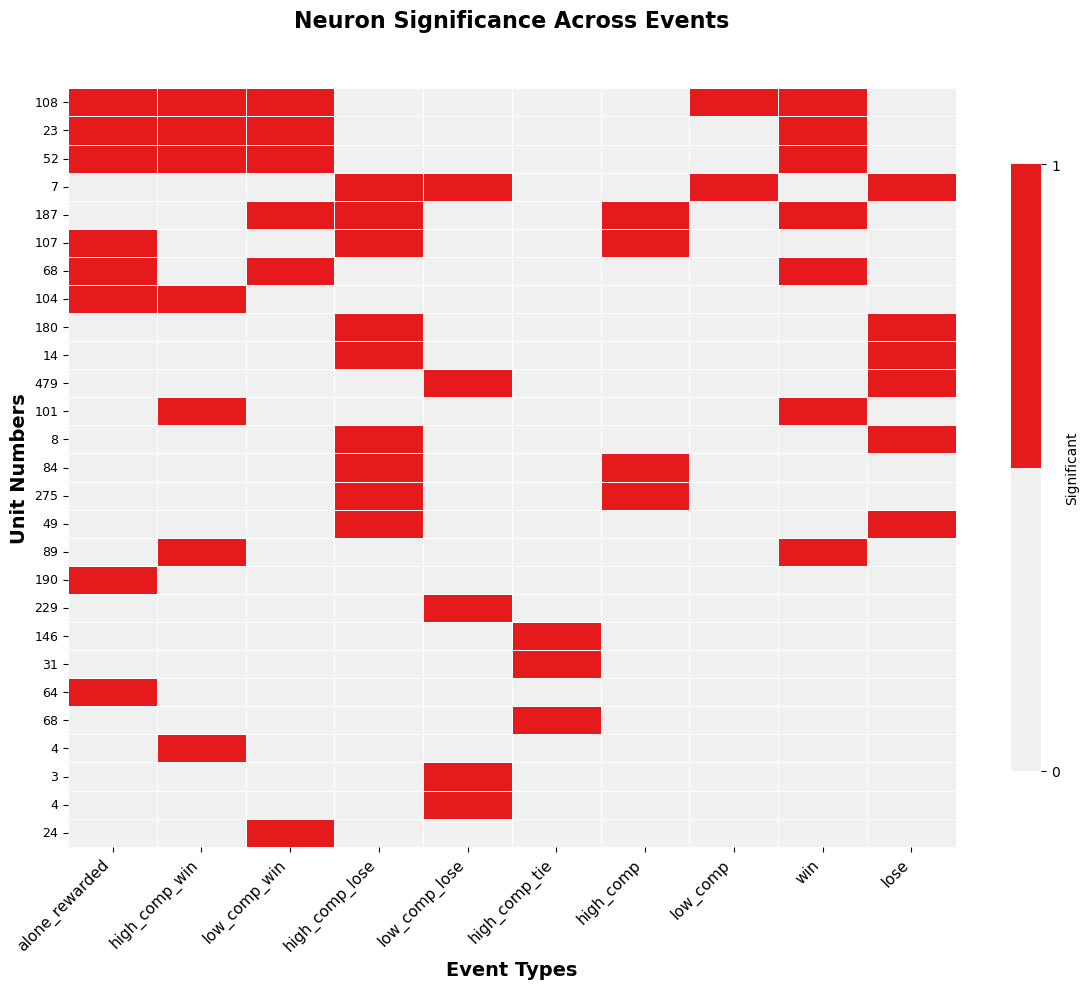

In [375]:
import matplotlib.pyplot as plt
import seaborn as sns

print("=== CREATING NEURON-EVENT SIGNIFICANCE HEATMAP (Improved Grouping & Colors) ===")

heatmap_exclude_events = [ 'alone_rewarded_baseline', 'high_comp_lose_baseline', 'high_comp_win_baseline', 
                           'low_comp_lose_baseline', 'low_comp_win_baseline', 'overall_pretone']

# Copy to avoid warnings
heat_map_exclude_sig = global_sig[~global_sig['Event name'].isin(heatmap_exclude_events)]

# Unique neuron ID
heat_map_exclude_sig['Neuron_ID'] = (
    heat_map_exclude_sig['Recording'].astype(str) +
    '_Unit_' + heat_map_exclude_sig['Unit number'].astype(str)
)

# Pivot for heatmap
heatmap_data = heat_map_exclude_sig.pivot_table(
    index='Neuron_ID',
    columns='Event name',
    values='Event Z-Score',
    fill_value=0
)

# Binary significance
significance_data = (heatmap_data != 0).astype(int)

# Order neurons by number of sig events
neuron_event_counts = significance_data.sum(axis=1).sort_values(ascending=False)
significance_data_sorted = significance_data.loc[neuron_event_counts.index]

# === Custom event ordering ===
# Put wins + alone_rewarded together, then losses, then ties
event_order = [
    "alone_rewarded",
    "high_comp_win", "low_comp_win",
    "high_comp_lose", "low_comp_lose",
    "high_comp_tie", "high_comp", "low_comp", "win", "lose"
]
# Reorder columns if they exist in data
event_order = [e for e in event_order if e in significance_data_sorted.columns]
significance_data_sorted = significance_data_sorted[event_order]

# Simpler y-axis labels
unit_labels = [neuron_id.split('_Unit_')[-1] for neuron_id in significance_data_sorted.index]

# === Plotting ===
plt.figure(figsize=(12, 10))

# Discrete colormap: gray (not sig) → bright red (sig)
cmap = sns.color_palette(["#f0f0f0", "#e41a1c"])  # light gray + strong red

sns.heatmap(significance_data_sorted,
            cmap=cmap,
            cbar_kws={'label': 'Significant', 'shrink': 0.8, 'ticks': [0, 1]},
            xticklabels=True,
            yticklabels=unit_labels,
            linewidths=0.5,
            linecolor='white',
            square=False,
            annot=False)


plt.title('Neuron Significance Across Events\n',
          fontsize=16, pad=25, fontweight='bold')
plt.xlabel('Event Types', fontsize=14, fontweight='bold')
plt.ylabel('Unit Numbers', fontsize=14, fontweight='bold')

plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=9)

# Clean frame
for side in ['top', 'right', 'bottom', 'left']:
    plt.gca().spines[side].set_visible(False)

plt.tight_layout()
plt.show()


In [313]:
# Count significant neurons by recording type, excluding baseline events
print("=== SIGNIFICANT NEURONS BY RECORDING TYPE (Excluding Baseline Events) ===")
print()

# Filter out neurons from excluded baseline events
filtered_sig_specific = sig_specific_event_df[~sig_specific_event_df['Event name'].isin(exclude_events_baseline_alone_rewarded)]
filtered_global_sig = global_sig[~global_sig['Event name'].isin(exclude_events_baseline_alone_rewarded)]

print(f"Excluded events: {exclude_events_baseline_alone_rewarded}")
print()

# Count significant neurons by recording type for event-specific baseline
print("📊 EVENT-SPECIFIC BASELINE ANALYSIS:")
print(f"Total significant neurons (after filtering): {len(filtered_sig_specific)}")
print()

# Group by recording and count unique units, then categorize
event_specific_counts = {}
for recording_name in filtered_sig_specific['Recording'].unique():
    rec_data = filtered_sig_specific[filtered_sig_specific['Recording'] == recording_name]
    unique_units = rec_data['Unit number'].nunique()  # Count unique units per recording
    category = categorize_recording(recording_name)
    
    if category not in event_specific_counts:
        event_specific_counts[category] = {'total_sig_neurons': 0, 'recordings': []}
    
    event_specific_counts[category]['total_sig_neurons'] += unique_units
    event_specific_counts[category]['recordings'].append((recording_name, unique_units))

# Print event-specific results
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in event_specific_counts:
        data = event_specific_counts[category]
        print(f"  {category.upper()}:")
        print(f"    Total significant neurons: {data['total_sig_neurons']}")
        print(f"    Number of recordings: {len(data['recordings'])}")
        for rec_name, count in data['recordings']:
            print(f"      • {rec_name}: {count} sig neurons")
        print()

print("-" * 80)

# Count significant neurons by recording type for global baseline
print("📊 GLOBAL BASELINE ANALYSIS:")
print(f"Total significant neurons (after filtering): {len(filtered_global_sig)}")
print()

global_counts = {}
for recording_name in filtered_global_sig['Recording'].unique():
    rec_data = filtered_global_sig[filtered_global_sig['Recording'] == recording_name]
    unique_units = rec_data['Unit number'].nunique()  # Count unique units per recording
    category = categorize_recording(recording_name)
    
    if category not in global_counts:
        global_counts[category] = {'total_sig_neurons': 0, 'recordings': []}
    
    global_counts[category]['total_sig_neurons'] += unique_units
    global_counts[category]['recordings'].append((recording_name, unique_units))

# Print global baseline results
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in global_counts:
        data = global_counts[category]
        print(f"  {category.upper()}:")
        print(f"    Total significant neurons: {data['total_sig_neurons']}")
        print(f"    Number of recordings: {len(data['recordings'])}")
        for rec_name, count in data['recordings']:
            print(f"      • {rec_name}: {count} sig neurons")
        print()

print("-" * 80)

# Summary comparison
print("=== COMPARISON SUMMARY ===")
print(f"{'Recording Type':<25} | {'Event-Specific':<15} | {'Global Baseline':<15}")
print("-" * 60)

all_categories = set(list(event_specific_counts.keys()) + list(global_counts.keys()))
for category in ['alone_comp', 'long_comp', 'standard_comp_to_omission', 'standard_comp_to_training', 'other']:
    if category in all_categories:
        event_count = event_specific_counts.get(category, {}).get('total_sig_neurons', 0)
        global_count = global_counts.get(category, {}).get('total_sig_neurons', 0)
        print(f"{category:<25} | {event_count:<15} | {global_count:<15}")

# Grand totals
total_event_specific = sum(data['total_sig_neurons'] for data in event_specific_counts.values())
total_global = sum(data['total_sig_neurons'] for data in global_counts.values())
print("-" * 60)
print(f"{'TOTAL':<25} | {total_event_specific:<15} | {total_global:<15}")

=== SIGNIFICANT NEURONS BY RECORDING TYPE (Excluding Baseline Events) ===

Excluded events: ['alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline', 'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline', 'low_comp_win_baseline', 'lose', 'win', 'overall_pretone']

📊 EVENT-SPECIFIC BASELINE ANALYSIS:
Total significant neurons (after filtering): 22

  ALONE_COMP:
    Total significant neurons: 3
    Number of recordings: 2
      • 20240320_171038_alone_comp_subj_4-2_t6b6_merged.rec: 1 sig neurons
      • 20240323_165815_alone_comp_subj_4-2_t5b5_merged.rec: 2 sig neurons

  LONG_COMP:
    Total significant neurons: 1
    Number of recordings: 1
      • 20240317_172017_long_comp_subj_4-3_t5b5_merged.rec: 1 sig neurons

  STANDARD_COMP_TO_OMISSION:
    Total significant neurons: 6
    Number of recordings: 4
      • 20230618_100636_standard_comp_to_omission_D2_subj_1-4_t4b3L_box1_merged.rec: 1 sig neurons
      • 20230619_115321_standard_comp_to_omission_D3_subj_1-4_t3b3L

In [301]:
hcw_global = global_sig.query('''`Event name` == 'high_comp_win' ''')
len(hcw_global)

7

In [302]:
lcw = global_sig.query("`Event name` == 'low_comp_win'")
len(lcw)

6

In [303]:
hcl = global_sig.query('''`Event name` == 'high_comp_lose' ''')
len(hcl)

9

In [304]:
lcl = global_sig.query('''`Event name` == 'low_comp_lose' ''')
len(lcl)

5

In [305]:
# find number of significant neurons per event
sig_global_counts = global_sig.groupby(['Event name', 'sig']).size().unstack()
sig_global_counts.head(20)

sig                      increase
Event name                       
alone_rewarded                  8
alone_rewarded_baseline         1
high_comp                       4
high_comp_lose                  9
high_comp_lose_baseline         1
high_comp_tie                   3
high_comp_win                   7
high_comp_win_baseline          1
lose                            6
low_comp                        2
low_comp_lose                   5
low_comp_lose_baseline          1
low_comp_win                    6
low_comp_win_baseline           1
overall_pretone                 1
win                             7

In [306]:
print(sig_global_counts)

sig                      increase
Event name                       
alone_rewarded                  8
alone_rewarded_baseline         1
high_comp                       4
high_comp_lose                  9
high_comp_lose_baseline         1
high_comp_tie                   3
high_comp_win                   7
high_comp_win_baseline          1
lose                            6
low_comp                        2
low_comp_lose                   5
low_comp_lose_baseline          1
low_comp_win                    6
low_comp_win_baseline           1
overall_pretone                 1
win                             7


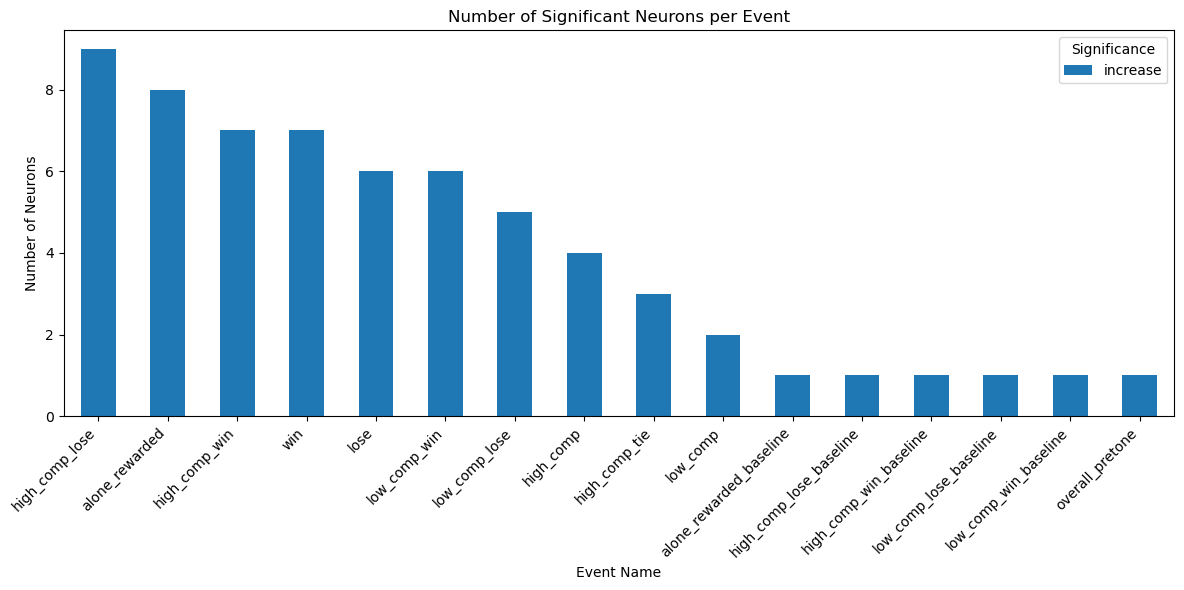

In [307]:
# bar plot from most increasing to least increasing significant neurons per event
import matplotlib.pyplot as plt
sig_global_counts_sorted = sig_global_counts.sort_values(by='increase', ascending=False)
sig_global_counts_sorted.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Significant Neurons per Event')
plt.xlabel('Event Name')
plt.ylabel('Number of Neurons')
plt.legend(title='Significance', loc='upper right')
# make the xlabels horizontal
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



In [308]:
# find the number of each type of event across all recordings
event_counts = {}
for rec in sp.recordings:
    for ev, windows in rec.event_dict.items():
        if ev not in event_counts:
            event_counts[ev] = 0
        event_counts[ev] += len(windows)

for ev, count in event_counts.items():
    print(f"Event: {ev}, Count: {count}")

Event: alone_rewarded, Count: 856
Event: alone_rewarded_baseline, Count: 320
Event: high_comp, Count: 625
Event: high_comp_lose, Count: 295
Event: high_comp_lose_baseline, Count: 330
Event: high_comp_win, Count: 330
Event: high_comp_win_baseline, Count: 320
Event: lose, Count: 435
Event: low_comp, Count: 316
Event: low_comp_lose, Count: 140
Event: low_comp_lose_baseline, Count: 328
Event: low_comp_win, Count: 176
Event: low_comp_win_baseline, Count: 322
Event: overall_pretone, Count: 1300
Event: win, Count: 506
Event: high_comp_tie, Count: 30


In [349]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def run_zscore_global_baseline_psth(recording, event_name, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using a global pooled baseline per unit with PSTH-like averaging.
    Computes baseline across all non-excluded events and event firing rates per time bin.
    Returns per-unit summary and time-resolved firing rates/z-scores for visualization.

    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    pre_window : float
        Duration (s) before events to use for baseline extraction.
    equalize : float
        Duration (s) of event window to analyze.
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based event rates (original output).
    time_df : pd.DataFrame
        Time-resolved firing rates and z-scores, averaged across trials per unit and time bin.
    """
    # --- Step 1: Identify good units ---
    units = getattr(recording, "good_units", None)
    if units is None:
        units = [u for u, label in recording.labels_dict.items() if label == "good"]
        if verbose:
            print("Using labels_dict for good units:", units)

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # Define time bins for baseline and event periods
    baseline_bins = np.arange(-pre_window * 1000, 0 + timebin_ms, timebin_ms)
    event_bins = np.arange(0, equalize * 1000 + timebin_ms, timebin_ms)
    time_points = np.concatenate([baseline_bins[:-1], event_bins[:-1]]) / 1000  # Convert to seconds

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    global_baseline_matrices = {u: [] for u in units}
    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)
                if verbose:
                    print(f"[{recording.name}] Unit {unit_id} | Baseline Event {ev_type}, Window {w}")
                    print(f"Baseline firing rates: {firing_rate}\n")

    # --- Step 3: Compute EVENT firing rates (PSTH-like) ---
    event_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]
    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            start_event = w[0]
            end_event = min(w[1], start_event + equalize * 1000)
            bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)
            if verbose:
                print(f"[{recording.name}] Unit {unit_id} | Event {event_name}, Window {w}")
                print(f"Event firing rates: {firing_rate}\n")

    # --- Step 4: Compute time-resolved firing rates and z-scores ---
    time_rows = []
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])
        event_fr_matrix = np.array(event_fr_matrices[unit_id])

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            b_mean = np.nan
            b_sd = np.nan
            ev_mean = np.nan
            zscore = np.nan
            baseline_fr_per_bin = np.full(len(baseline_bins) - 1, np.nan)
            event_fr_per_bin = np.full(len(event_bins) - 1, np.nan)
            zscore_per_bin = np.full(len(time_points), np.nan)
        else:
            # Handle inconsistent bin counts by trimming to shortest
            if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
                baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming baseline matrix for unit {unit_id} to {min_bins} bins")
            if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
                min_bins = min(len(row) for row in event_fr_matrices[unit_id])
                event_fr_matrix = event_fr_matrix[:, :min_bins]
                if verbose:
                    print(f"Trimming event matrix for unit {unit_id} to {min_bins} bins")

            # Baseline stats
            b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
            b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan
            b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
            b_sd = np.sqrt(np.mean(b_var_per_bin)) if len(b_var_per_bin) > 0 else np.nan

            # Event mean (overall for summary)
            ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
            ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan
            zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

            # Time-resolved firing rates
            baseline_fr_per_bin = b_mean_per_bin[:len(baseline_bins) - 1]  # Trim to match bins
            event_fr_per_bin = ev_mean_per_bin[:len(event_bins) - 1]
            zscore_per_bin = np.concatenate([
                (baseline_fr_per_bin - b_mean) / b_sd if not np.isnan(b_sd) and b_sd != 0 else np.full(len(baseline_fr_per_bin), np.nan),
                (event_fr_per_bin - b_mean) / b_sd if not np.isnan(b_sd) and b_sd != 0 else np.full(len(event_fr_per_bin), np.nan)
            ])

        # Append to summary DataFrame
        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-event M": b_mean,
            "Global Pre-event SD": b_sd,
            "Event M": ev_mean,
            "Event Z-Score": zscore,
        })

        # Append to time-resolved DataFrame
        for t, fr, z in zip(time_points, np.concatenate([baseline_fr_per_bin, event_fr_per_bin]), zscore_per_bin):
            time_rows.append({
                "Recording": recording.name,
                "Event name": event_name,
                "Unit number": unit_id,
                "Time (s)": t,
                "Firing Rate (Hz)": fr,
                "Z-Score": z
            })

    # Create DataFrames
    df = pd.DataFrame(rows)
    df["sig"] = np.select(
        [df["Event Z-Score"] > SD, df["Event Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )
    time_df = pd.DataFrame(time_rows)

    return df, time_df


def plot_temporal_dynamics_all_events(time_dfs, pre_window=10, equalize=10):
    """
    Plot average firing rate and z-score over time for each event type, averaged across recordings.

    Parameters
    ----------
    time_dfs : dict
        Dictionary of time-resolved DataFrames, keyed by event name.
    pre_window : float
        Duration (s) of baseline period.
    equalize : float
        Duration (s) of event period.
    """
    for event_name, time_df in time_dfs.items():
        if time_df.empty:
            print(f"Skipping {event_name}: no data")
            continue

        # Average across units and recordings
        avg_time_df = time_df.groupby("Time (s)").agg({
            "Firing Rate (Hz)": ["mean", "std"],
            "Z-Score": ["mean", "std"]
        }).reset_index()
        avg_time_df.columns = ["Time (s)", "Firing Rate Mean", "Firing Rate Std", "Z-Score Mean", "Z-Score Std"]

        # Compute standard error
        n_units = time_df.groupby(["Recording", "Unit number"]).ngroups
        avg_time_df["Firing Rate SE"] = avg_time_df["Firing Rate Std"] / np.sqrt(n_units)
        avg_time_df["Z-Score SE"] = avg_time_df["Z-Score Std"] / np.sqrt(n_units)

        # Plot
        plt.figure(figsize=(12, 8))

        # Firing rate plot
        plt.subplot(2, 1, 1)
        plt.plot(avg_time_df["Time (s)"], avg_time_df["Firing Rate Mean"], label="Mean Firing Rate", color="blue")
        plt.fill_between(
            avg_time_df["Time (s)"],
            avg_time_df["Firing Rate Mean"] - avg_time_df["Firing Rate SE"],
            avg_time_df["Firing Rate Mean"] + avg_time_df["Firing Rate SE"],
            color="blue", alpha=0.2, label="±1 SE"
        )
        plt.axvline(0, color="black", linestyle="--", label="Event Onset")
        plt.axvspan(-pre_window, 0, alpha=0.1, color="gray", label="Baseline")
        plt.axvspan(0, equalize, alpha=0.1, color="green", label="Event")
        plt.xlabel("Time (s)")
        plt.ylabel("Firing Rate (Hz)")
        plt.title(f"PSTH for {event_name} (Averaged Across Recordings)")
        plt.legend()

        # Z-score plot
        plt.subplot(2, 1, 2)
        plt.plot(avg_time_df["Time (s)"], avg_time_df["Z-Score Mean"], label="Mean Z-Score", color="red")
        plt.fill_between(
            avg_time_df["Time (s)"],
            avg_time_df["Z-Score Mean"] - avg_time_df["Z-Score SE"],
            avg_time_df["Z-Score Mean"] + avg_time_df["Z-Score SE"],
            color="red", alpha=0.2, label="±1 SE"
        )
        plt.axvline(0, color="black", linestyle="--", label="Event Onset")
        plt.axvspan(-pre_window, 0, alpha=0.1, color="gray", label="Baseline")
        plt.axvspan(0, equalize, alpha=0.1, color="green", label="Event")
        plt.axhline(1.65, color="black", linestyle=":", label="Z=1.65")
        plt.axhline(-1.65, color="black", linestyle=":")
        plt.xlabel("Time (s)")
        plt.ylabel("Z-Score")
        plt.title(f"Z-Score Dynamics for {event_name} (Averaged Across Recordings)")
        plt.legend()

        plt.tight_layout()
        plt.show()

In [350]:
import pandas as pd
import numpy as np

def run_all_recordings_all_events_global_psth(sp, pre_window=10, equalize=10, timebin=0.25, SD=1.65, verbose=False):
    """
    Run z-score analysis for all recordings and events, collecting both per-unit and time-resolved data.

    Parameters
    ----------
    sp : object
        Object containing a list of SpikeRecording objects in sp.recordings.
    pre_window : float
        Duration (s) before events for baseline.
    equalize : float
        Duration (s) of event window to analyze.
    timebin : float
        Bin width (s) for PSTH computation.
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    big_df : pd.DataFrame
        Concatenated per-unit z-scores across all recordings and events.
    time_dfs : dict
        Dictionary of time-resolved DataFrames, keyed by event name.
    skipped_df : pd.DataFrame
        Records of skipped recording-event pairs with reasons.
    """
    all_event_names = sorted({ev for rec in sp.recordings for ev in rec.event_dict.keys()})
    dfs = []
    time_dfs = {ev: [] for ev in all_event_names}  # Store time_df for each event
    skipped = []

    for rec in sp.recordings:
        for ev in all_event_names:
            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                skipped.append((rec.name, ev, "no windows"))
                continue
            try:
                # Run the modified function, which returns (df, time_df)
                df, time_df = run_zscore_global_baseline_psth(
                    recording=rec,
                    event_name=ev,
                    pre_window=pre_window,
                    equalize=equalize,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                if not df.empty:
                    df["Event windows"] = len(rec.event_dict[ev])
                    dfs.append(df)
                else:
                    skipped.append((rec.name, ev, "empty per-unit result"))
                if not time_df.empty:
                    time_dfs[ev].append(time_df)
                else:
                    skipped.append((rec.name, ev, "empty time-resolved result"))
            except Exception as e:
                skipped.append((rec.name, ev, f"error: {str(e)}"))

    # Concatenate per-unit DataFrames
    big_df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

    # Concatenate time-resolved DataFrames for each event
    time_dfs_combined = {
        ev: pd.concat(tdfs, ignore_index=True) if tdfs else pd.DataFrame()
        for ev, tdfs in time_dfs.items()
    }

    # Create skipped DataFrame
    skipped_df = pd.DataFrame(skipped, columns=["Recording", "Event name", "reason"])

    return big_df, time_dfs_combined, skipped_df

big_df shape: (6677, 9)
Skipped counts: 228
# sig: sig
not sig     6614
increase      63
Name: count, dtype: int64


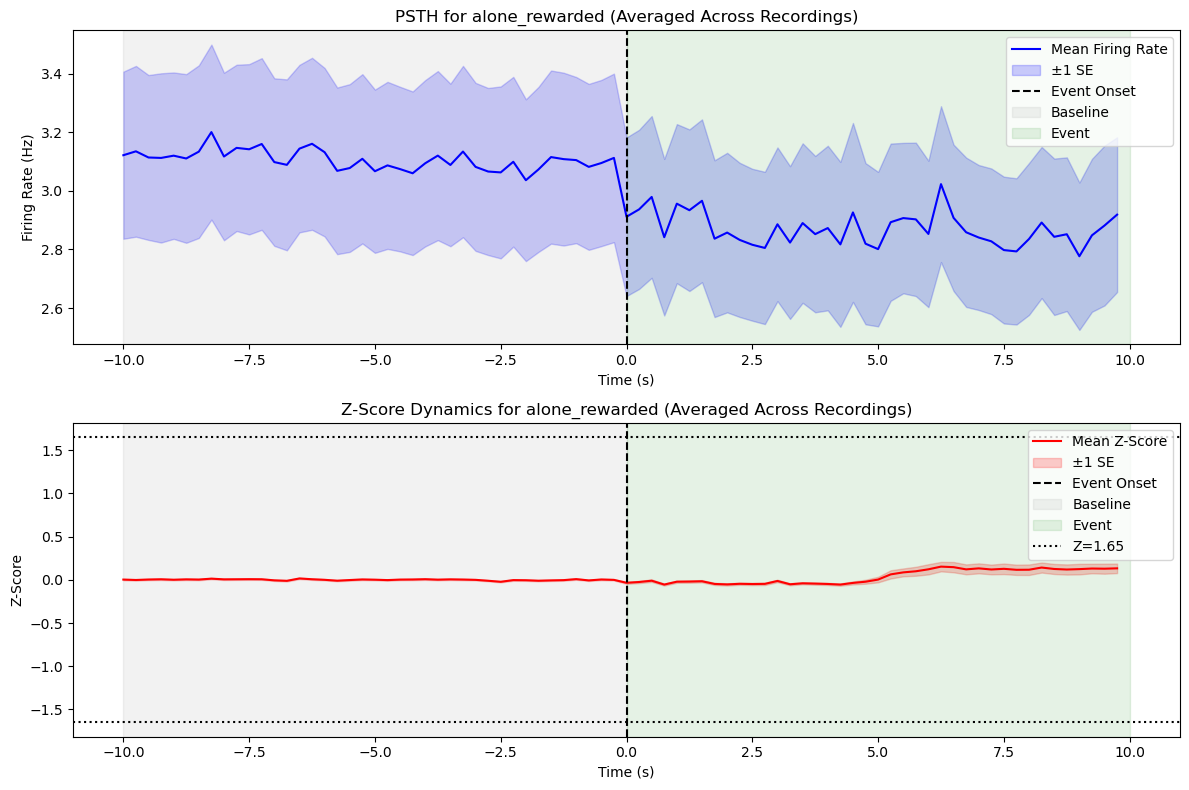

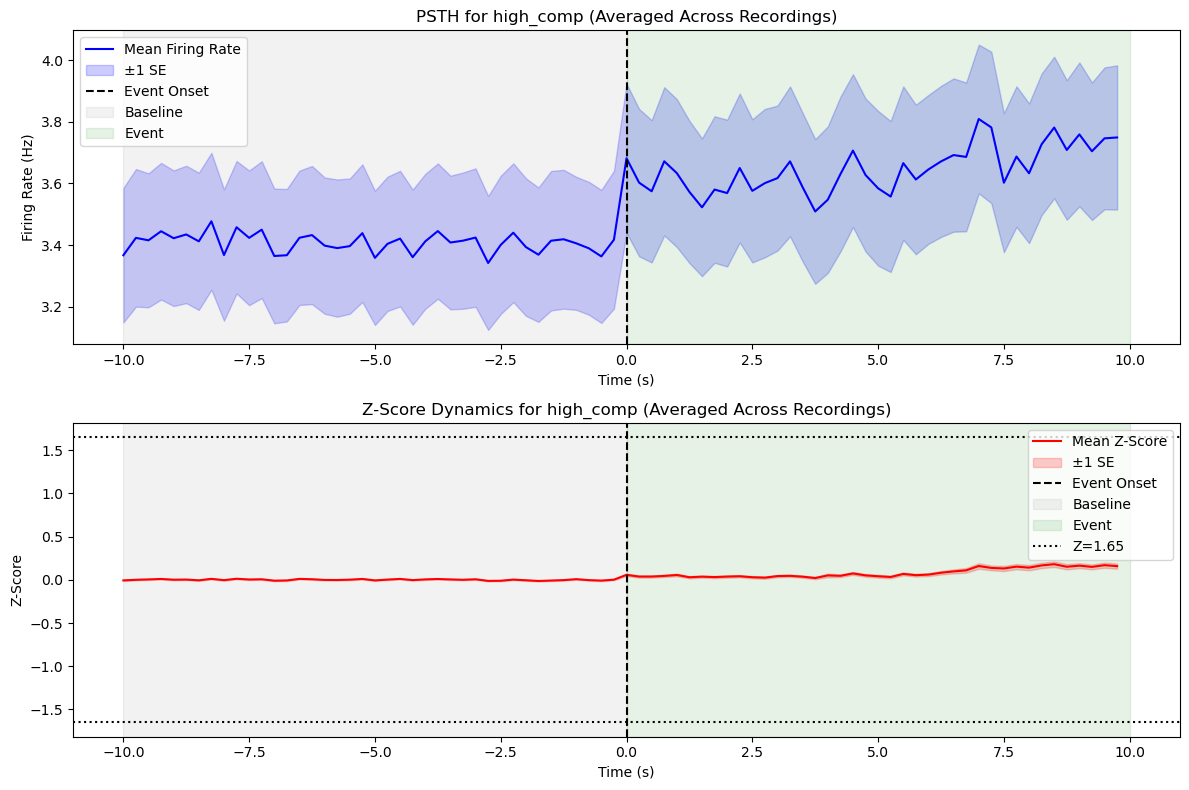

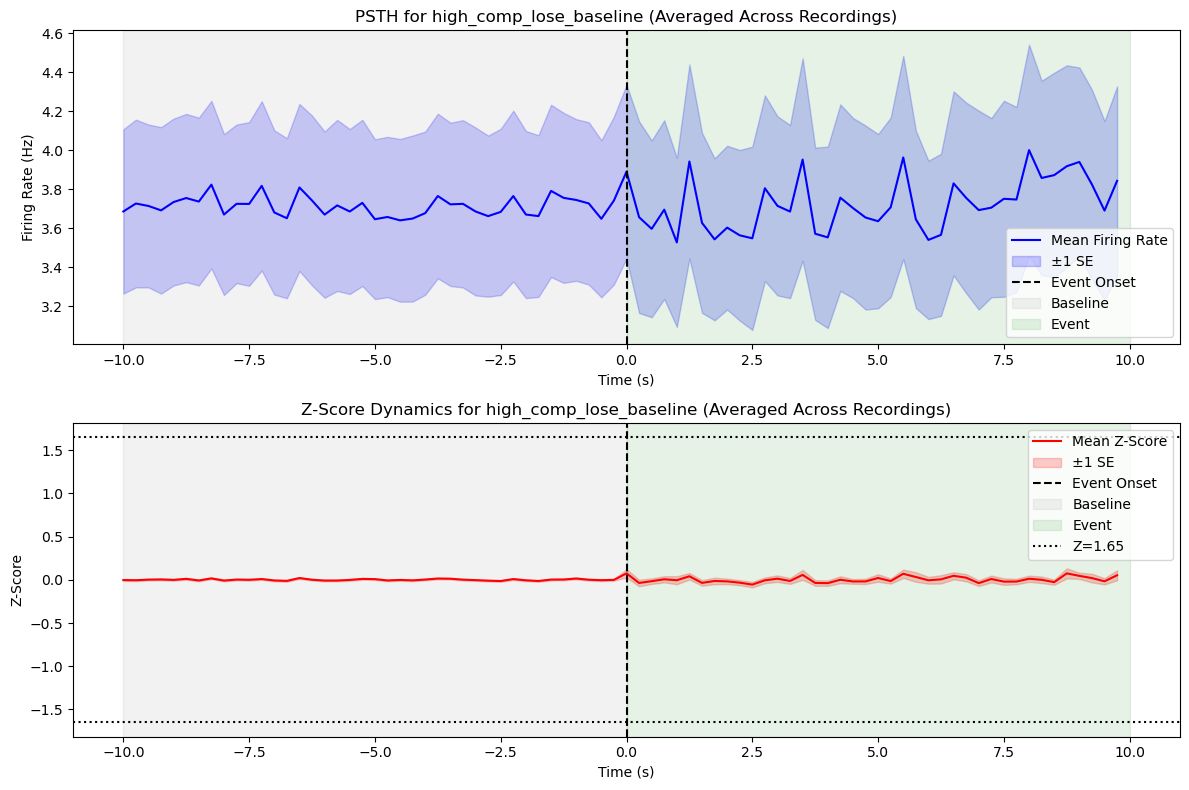

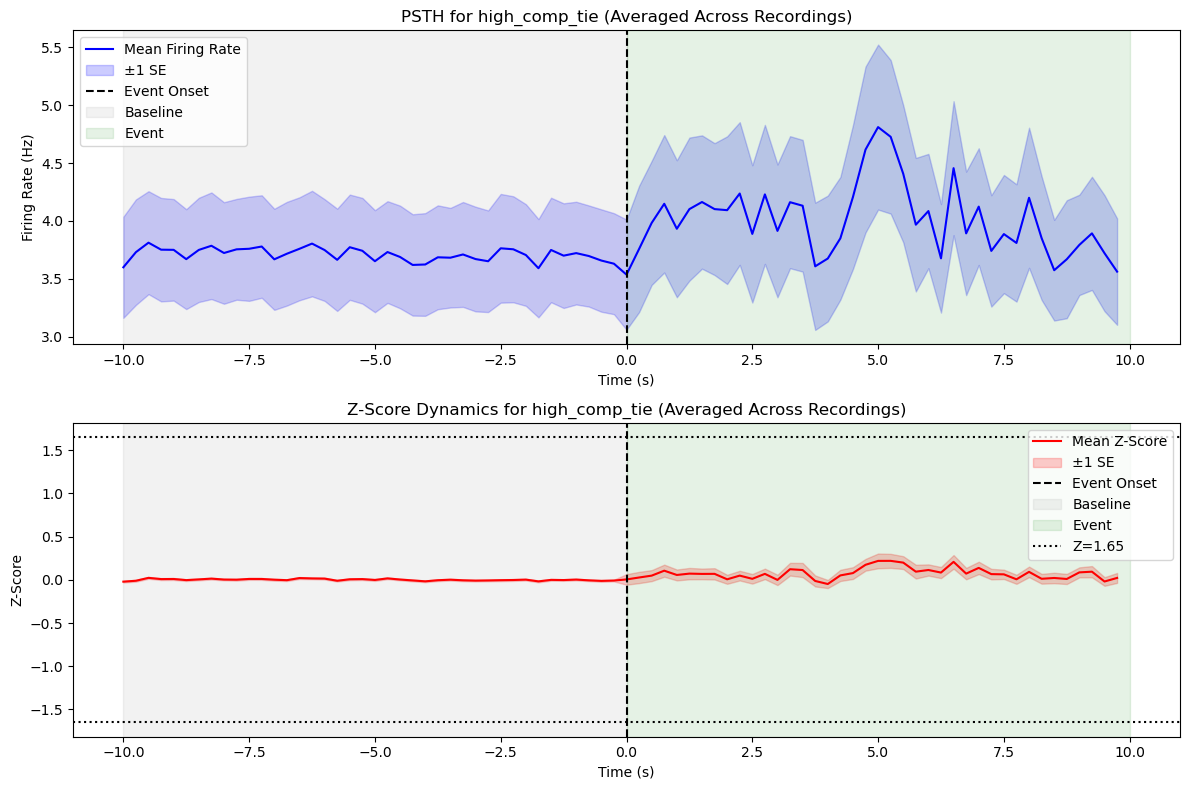

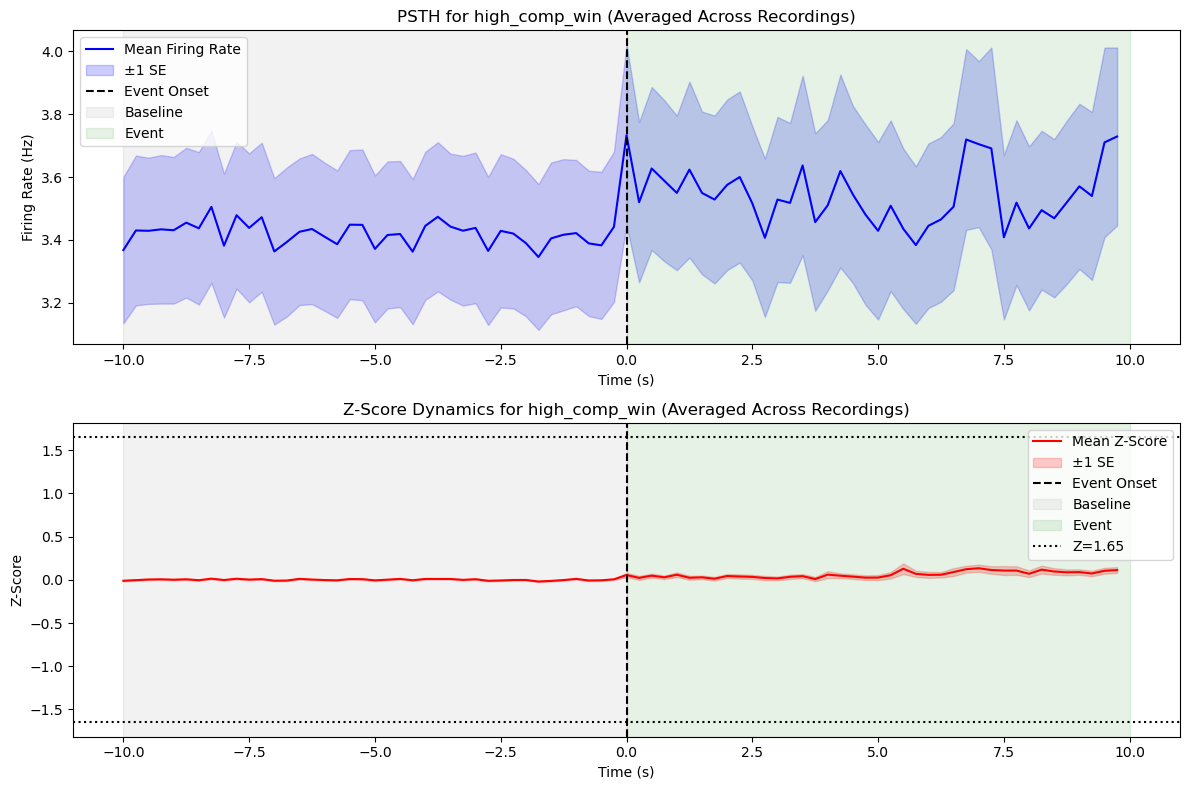

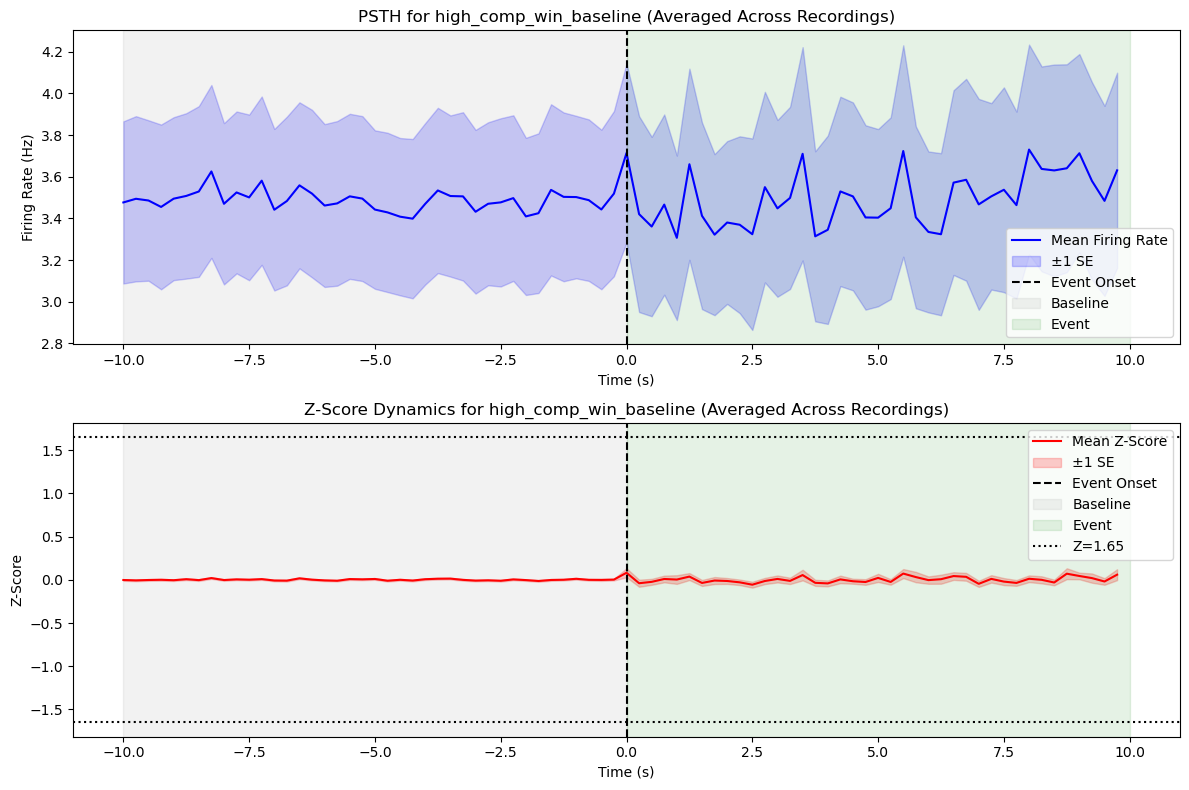

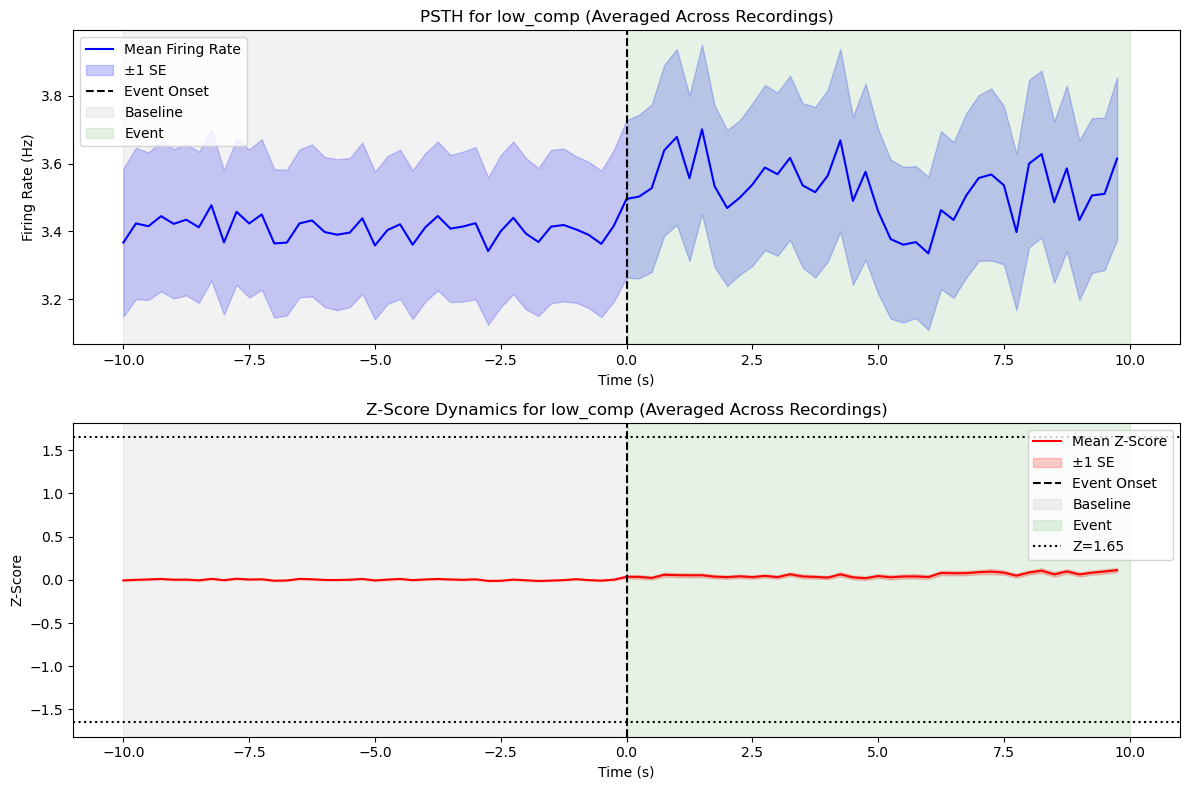

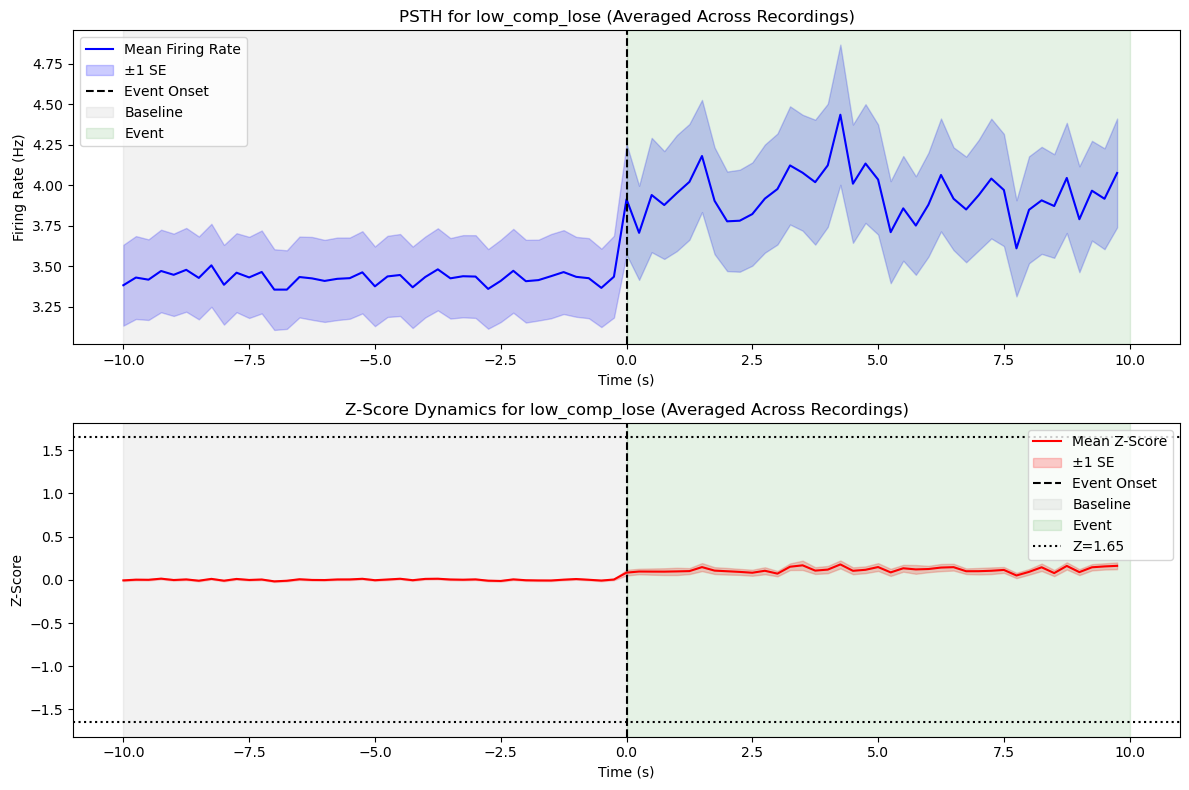

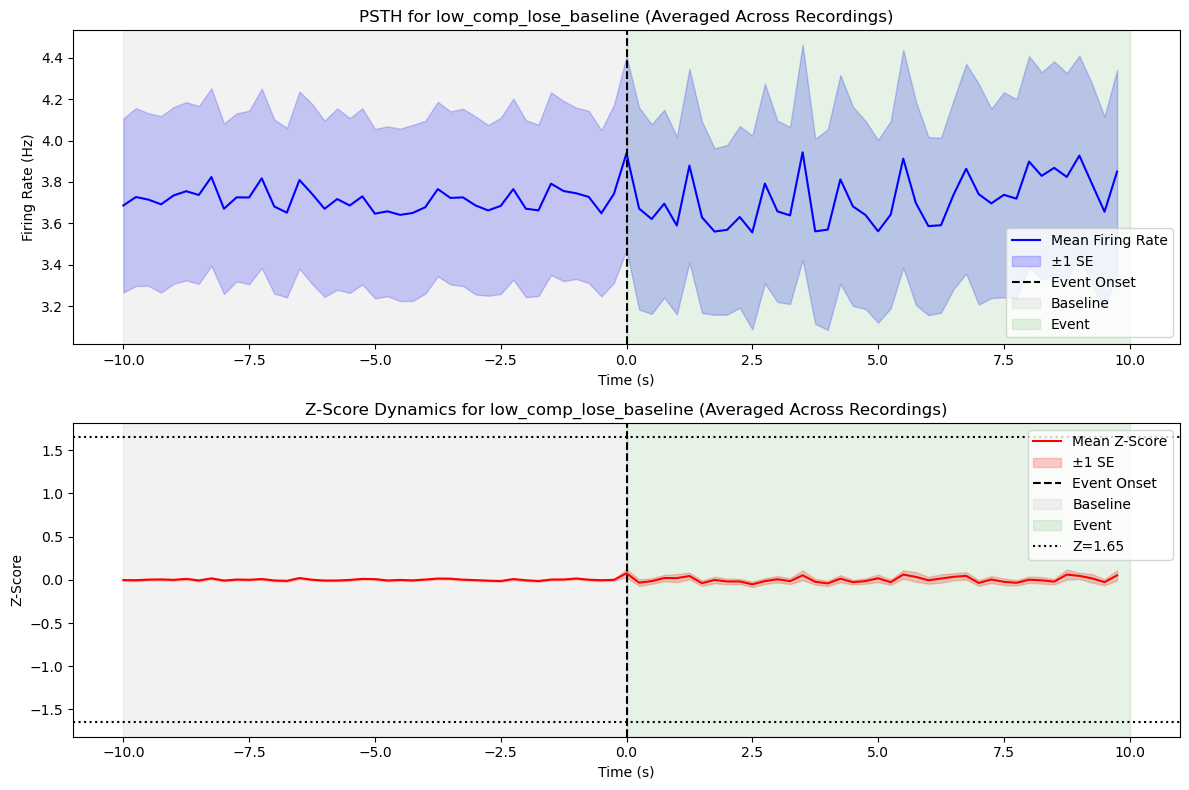

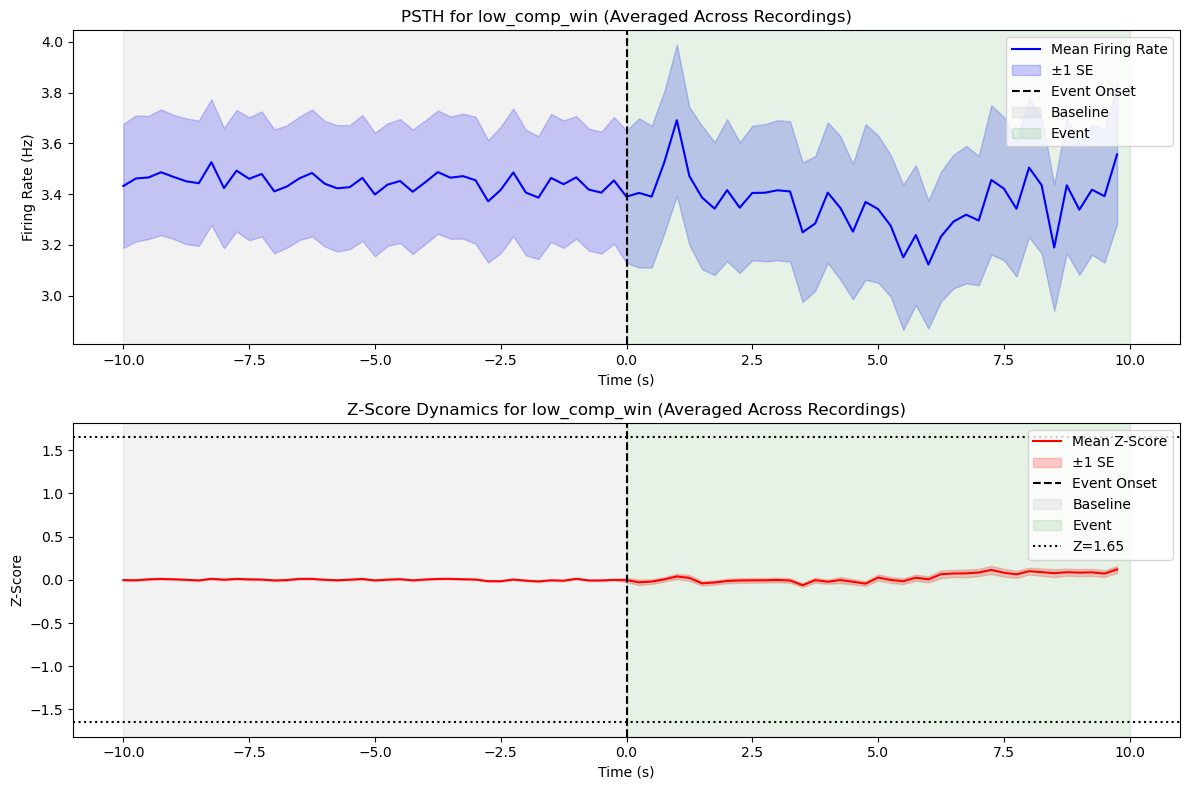

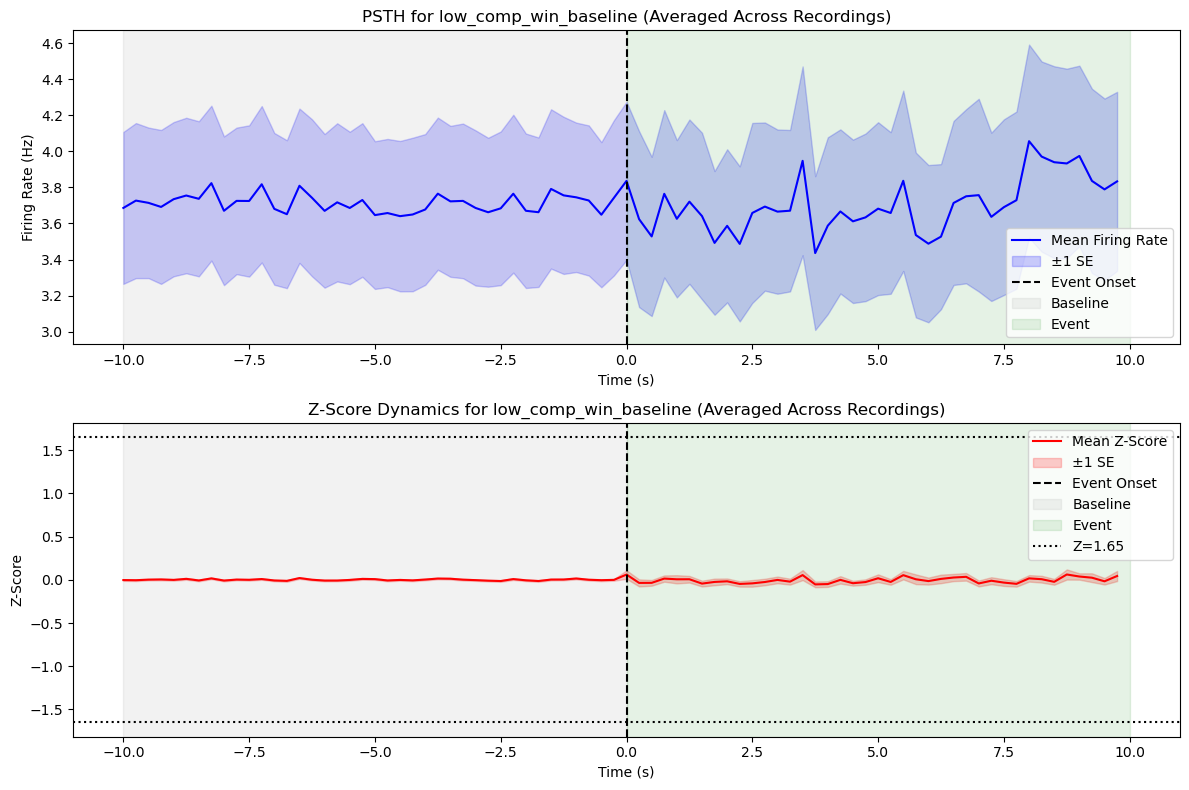

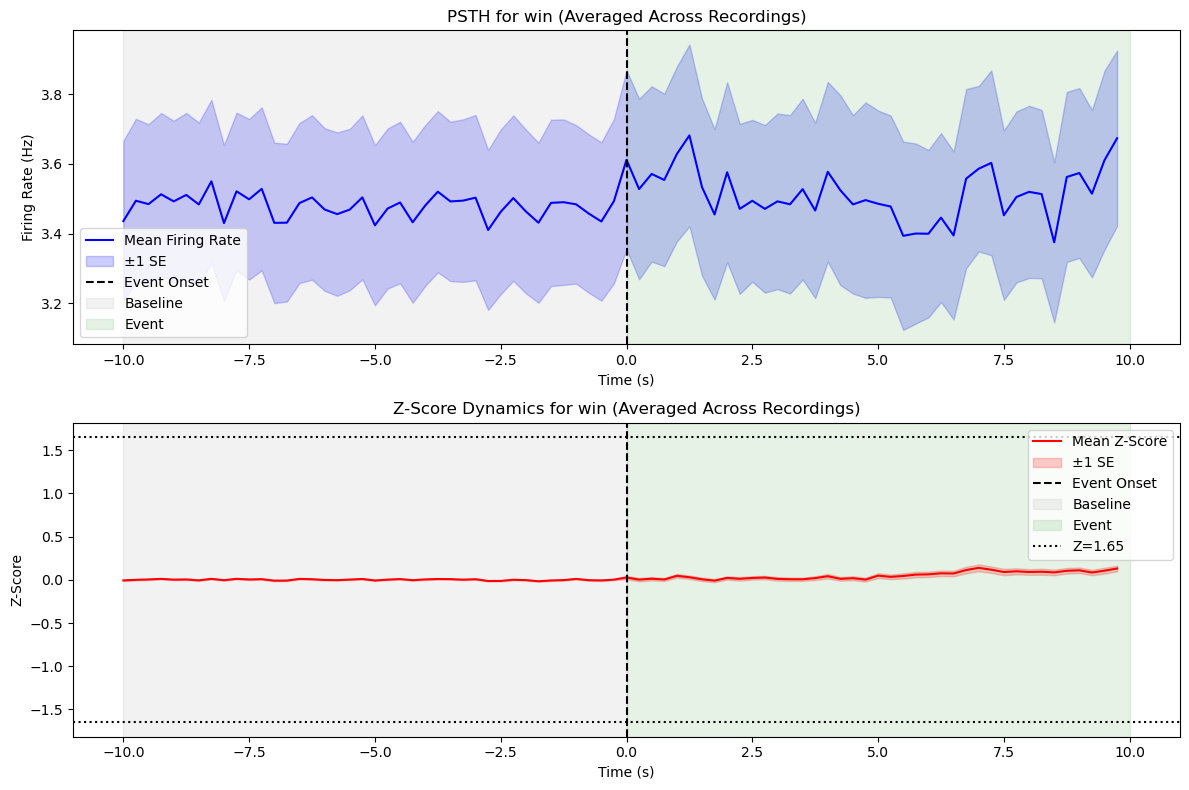

In [351]:
# Run the analysis across all recordings and events
big_df, time_dfs, skipped_df = run_all_recordings_all_events_global_psth(
    sp,
    pre_window=10,
    equalize=10,
    timebin=0.25,
    SD=1.65,
    verbose=False
)

# Print summary
print(f"big_df shape: {big_df.shape}")
print(f"Skipped counts: {skipped_df.shape[0]}")
print(f"# sig: {big_df['sig'].value_counts()}")
'''
# Save per-unit results
big_df.to_csv(
    "C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/zscores_global_baseline.csv",
    index=False
)

# Save time-resolved results for each event
for event_name, time_df in time_dfs.items():
    if not time_df.empty:
        time_df.to_csv(
            f"C:/Users/thoma/Code/ResearchCode/diff_fam_social_memory_ephys/other_peoples_sutff/Thomas/reward_comp/outputs/time_resolved_{event_name}.csv",
            index=False
        )
'''
# Plot temporal dynamics for all events
plot_temporal_dynamics_all_events(time_dfs, pre_window=10, equalize=10)

In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def run_zscore_global_baseline_psth_extended_sig_only(recording, event_name, significant_units, pre_window=10, 
                                                      equalize=10, post_window=5, timebin=0.25, SD=1.65, verbose=False):
    """
    Z-score event firing rates using a global pooled baseline, but only for SIGNIFICANT units.
    Extends the analysis window to include post_window seconds after the event ends.
    
    Parameters
    ----------
    recording : SpikeRecording
        SpikeRecording object with spike data and event_dict.
    event_name : str
        Event type to analyze.
    significant_units : list
        List of unit IDs that are significant for this event type.
    pre_window : float
        Duration (s) before events to use for baseline extraction.
    equalize : float
        Duration (s) of event window to analyze.
    post_window : float
        Duration (s) after event to include in analysis.
    timebin : float
        Bin width (s) for PSTH computation (default 0.25s = 250ms).
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    df : pd.DataFrame
        Per-unit z-scores with global baseline and PSTH-based event rates (only significant units).
    time_df : pd.DataFrame
        Time-resolved firing rates and z-scores for significant units only.
    """
    # Only analyze significant units
    units = significant_units
    if not units:
        if verbose:
            print(f"No significant units for {event_name}")
        return pd.DataFrame(), pd.DataFrame()
    
    if verbose:
        print(f"Analyzing {len(units)} significant units for {event_name}: {units}")

    # Define events to exclude from baseline
    exclude_events_baseline = [
        'alone_rewarded_baseline', 'high_comp', 'high_comp_lose_baseline',
        'high_comp_win_baseline', 'low_comp', 'low_comp_lose_baseline',
        'low_comp_win_baseline', 'lose', 'win', 'overall_pretone'
    ]

    timebin_ms = timebin * 1000
    sampling_rate = recording.sampling_rate

    # Define time bins for baseline, event, and post-event periods
    baseline_bins = np.arange(-pre_window * 1000, 0 + timebin_ms, timebin_ms)
    event_bins = np.arange(0, equalize * 1000 + timebin_ms, timebin_ms)
    post_bins = np.arange(equalize * 1000, (equalize + post_window) * 1000 + timebin_ms, timebin_ms)
    
    # Combine all time points
    time_points = np.concatenate([
        baseline_bins[:-1], 
        event_bins[:-1], 
        post_bins[:-1]
    ]) / 1000  # Convert to seconds

    # --- Step 2: Compute GLOBAL baseline firing rates (PSTH-like) ---
    global_baseline_matrices = {u: [] for u in units}
    for ev_type, ev_windows in recording.event_dict.items():
        if ev_type in exclude_events_baseline:
            continue
        for unit_id in units:
            spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
            for w in ev_windows:
                start_baseline = w[0] - pre_window * 1000
                end_baseline = w[0]
                bins = np.arange(start_baseline, end_baseline + timebin_ms, timebin_ms)
                spike_counts = np.histogram(spikes_ms, bins=bins)[0]
                firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
                global_baseline_matrices[unit_id].append(firing_rate)

    # --- Step 3: Compute EVENT + POST-EVENT firing rates ---
    event_fr_matrices = {u: [] for u in units}
    post_fr_matrices = {u: [] for u in units}
    event_windows = recording.event_dict[event_name]
    
    for unit_id in units:
        spikes_ms = recording.unit_timestamps[unit_id] * (1000 / sampling_rate)
        for w in event_windows:
            start_event = w[0]
            end_event = min(w[1], start_event + equalize * 1000)
            
            # Event period
            bins = np.arange(start_event, end_event + timebin_ms, timebin_ms)
            spike_counts = np.histogram(spikes_ms, bins=bins)[0]
            firing_rate = spike_counts * (1000 / timebin_ms)  # Hz
            event_fr_matrices[unit_id].append(firing_rate)
            
            # Post-event period
            start_post = end_event
            end_post = start_post + post_window * 1000
            bins_post = np.arange(start_post, end_post + timebin_ms, timebin_ms)
            spike_counts_post = np.histogram(spikes_ms, bins=bins_post)[0]
            firing_rate_post = spike_counts_post * (1000 / timebin_ms)  # Hz
            post_fr_matrices[unit_id].append(firing_rate_post)

    # --- Step 4: Compute time-resolved firing rates and z-scores ---
    time_rows = []
    rows = []
    for unit_id in units:
        baseline_fr_matrix = np.array(global_baseline_matrices[unit_id])
        event_fr_matrix = np.array(event_fr_matrices[unit_id])
        post_fr_matrix = np.array(post_fr_matrices[unit_id])

        if baseline_fr_matrix.size == 0 or event_fr_matrix.size == 0:
            # Skip if no data
            continue
        
        # Handle inconsistent bin counts
        if len(set(len(row) for row in global_baseline_matrices[unit_id])) > 1:
            min_bins = min(len(row) for row in global_baseline_matrices[unit_id])
            baseline_fr_matrix = baseline_fr_matrix[:, :min_bins]
        if len(set(len(row) for row in event_fr_matrices[unit_id])) > 1:
            min_bins = min(len(row) for row in event_fr_matrices[unit_id])
            event_fr_matrix = event_fr_matrix[:, :min_bins]
        if len(set(len(row) for row in post_fr_matrices[unit_id])) > 1:
            min_bins = min(len(row) for row in post_fr_matrices[unit_id])
            post_fr_matrix = post_fr_matrix[:, :min_bins]

        # Baseline stats
        b_mean_per_bin = np.mean(baseline_fr_matrix, axis=0)
        b_mean = np.mean(b_mean_per_bin) if len(b_mean_per_bin) > 0 else np.nan
        b_var_per_bin = np.var(baseline_fr_matrix, axis=0, ddof=1)
        b_sd = np.sqrt(np.mean(b_var_per_bin)) if len(b_var_per_bin) > 0 else np.nan

        # Event mean (overall for summary)
        ev_mean_per_bin = np.mean(event_fr_matrix, axis=0)
        ev_mean = np.mean(ev_mean_per_bin) if len(ev_mean_per_bin) > 0 else np.nan
        zscore = np.nan if np.isnan(b_sd) or b_sd == 0 else (ev_mean - b_mean) / b_sd

        # Post-event mean  
        post_mean_per_bin = np.mean(post_fr_matrix, axis=0) if post_fr_matrix.size > 0 else np.array([])

        # Time-resolved firing rates
        baseline_fr_per_bin = b_mean_per_bin[:len(baseline_bins) - 1]
        event_fr_per_bin = ev_mean_per_bin[:len(event_bins) - 1]
        post_fr_per_bin = post_mean_per_bin[:len(post_bins) - 1] if len(post_mean_per_bin) > 0 else np.array([])
        
        # Combine all firing rates
        all_firing_rates = np.concatenate([baseline_fr_per_bin, event_fr_per_bin, post_fr_per_bin])
        
        # Z-scores for all time points
        zscore_per_bin = (all_firing_rates - b_mean) / b_sd if not np.isnan(b_sd) and b_sd != 0 else np.full(len(all_firing_rates), np.nan)

        # Append to summary DataFrame
        rows.append({
            "Recording": recording.name,
            "Event name": event_name,
            "Unit number": unit_id,
            "Global Pre-event M": b_mean,
            "Global Pre-event SD": b_sd,
            "Event M": ev_mean,
            "Event Z-Score": zscore,
        })

        # Append to time-resolved DataFrame
        for t, fr, z in zip(time_points[:len(all_firing_rates)], all_firing_rates, zscore_per_bin):
            time_rows.append({
                "Recording": recording.name,
                "Event name": event_name,
                "Unit number": unit_id,
                "Time (s)": t,
                "Firing Rate (Hz)": fr,
                "Z-Score": z
            })

    # Create DataFrames
    df = pd.DataFrame(rows)
    df["sig"] = np.select(
        [df["Event Z-Score"] > SD, df["Event Z-Score"] < -SD],
        ["increase", "decrease"],
        default="not sig"
    )
    time_df = pd.DataFrame(time_rows)

    return df, time_df

In [353]:
def run_all_recordings_significant_units_only(sp, big_df_with_sig, pre_window=10, equalize=10, 
                                            post_window=5, timebin=0.25, SD=1.65, verbose=False):
    """
    Run time-resolved analysis for SIGNIFICANT UNITS ONLY across all recordings and events.
    
    Parameters
    ----------
    sp : object
        Object containing a list of SpikeRecording objects in sp.recordings.
    big_df_with_sig : pd.DataFrame
        DataFrame containing significance information for each unit-event combination.
    pre_window : float
        Duration (s) before events for baseline.
    equalize : float
        Duration (s) of event window to analyze.
    post_window : float
        Duration (s) after event to include.
    timebin : float
        Bin width (s) for PSTH computation.
    SD : float
        Threshold in SD units for significance classification.
    verbose : bool
        Print debug info if True.

    Returns
    -------
    time_dfs_sig_only : dict
        Dictionary of time-resolved DataFrames for significant units only, keyed by event name.
    summary_df : pd.DataFrame
        Summary of how many significant units were analyzed per event.
    """
    # Get only significant entries
    sig_only_df = big_df_with_sig[big_df_with_sig['sig'] != 'not sig'].copy()
    
    # Get all event names
    all_event_names = sorted(sig_only_df['Event name'].unique())
    
    time_dfs_sig_only = {ev: [] for ev in all_event_names}
    summary_data = []
    
    for rec in sp.recordings:
        for ev in all_event_names:
            # Get significant units for this recording and event
            sig_units_for_event = sig_only_df[
                (sig_only_df['Recording'] == rec.name) & 
                (sig_only_df['Event name'] == ev)
            ]['Unit number'].tolist()
            
            if not sig_units_for_event:
                if verbose:
                    print(f"No significant units for {rec.name} / {ev}")
                summary_data.append({
                    'Recording': rec.name,
                    'Event name': ev,
                    'Significant units': 0,
                    'Status': 'No significant units'
                })
                continue
                
            if ev not in rec.event_dict or len(rec.event_dict[ev]) == 0:
                if verbose:
                    print(f"No event windows for {rec.name} / {ev}")
                summary_data.append({
                    'Recording': rec.name,
                    'Event name': ev,
                    'Significant units': len(sig_units_for_event),
                    'Status': 'No event windows'
                })
                continue
                
            try:
                # Run analysis for significant units only
                df, time_df = run_zscore_global_baseline_psth_extended_sig_only(
                    recording=rec,
                    event_name=ev,
                    significant_units=sig_units_for_event,
                    pre_window=pre_window,
                    equalize=equalize,
                    post_window=post_window,
                    timebin=timebin,
                    SD=SD,
                    verbose=verbose
                )
                
                if not time_df.empty:
                    time_dfs_sig_only[ev].append(time_df)
                    summary_data.append({
                        'Recording': rec.name,
                        'Event name': ev,
                        'Significant units': len(sig_units_for_event),
                        'Status': 'Success'
                    })
                    if verbose:
                        print(f"Processed {rec.name} / {ev}: {len(sig_units_for_event)} significant units")
                else:
                    summary_data.append({
                        'Recording': rec.name,
                        'Event name': ev,
                        'Significant units': len(sig_units_for_event),
                        'Status': 'Empty result'
                    })
                    
            except Exception as e:
                summary_data.append({
                    'Recording': rec.name,
                    'Event name': ev,
                    'Significant units': len(sig_units_for_event),
                    'Status': f'Error: {str(e)}'
                })
                if verbose:
                    print(f"Error processing {rec.name} / {ev}: {e}")
    
    # Combine time-resolved DataFrames for each event
    time_dfs_combined = {
        ev: pd.concat(tdfs, ignore_index=True) if tdfs else pd.DataFrame()
        for ev, tdfs in time_dfs_sig_only.items()
    }
    
    # Create summary DataFrame
    summary_df = pd.DataFrame(summary_data)
    
    return time_dfs_combined, summary_df

In [363]:
def plot_temporal_dynamics_significant_units_extended(time_dfs, pre_window=10, equalize=10, post_window=5, 
                                                    exclude_events=None):
    """
    Plot average firing rate and z-score over time for each event type, 
    averaged across SIGNIFICANT UNITS ONLY, with extended post-event window.

    Parameters
    ----------
    time_dfs : dict
        Dictionary of time-resolved DataFrames for significant units, keyed by event name.
    pre_window : float
        Duration (s) of baseline period.
    equalize : float
        Duration (s) of event period.
    post_window : float
        Duration (s) of post-event period.
    exclude_events : list, optional
        List of event names to exclude from plotting.
    """
    if exclude_events is None:
        exclude_events = []
    
    print("=== TEMPORAL DYNAMICS FOR SIGNIFICANT UNITS ONLY ===")
    print(f"Extended window: -{pre_window}s to +{equalize + post_window}s")
    print()
    
    for event_name, time_df in time_dfs.items():
        if event_name in exclude_events:
            continue
            
        if time_df.empty:
            print(f"⚠️  Skipping {event_name}: no significant units")
            continue

        # Count unique significant units
        n_units = time_df.groupby(["Recording", "Unit number"]).ngroups
        n_recordings = time_df["Recording"].nunique()
        
        print(f"📊 {event_name}: {n_units} significant units across {n_recordings} recordings")

        # Average across units and recordings
        avg_time_df = time_df.groupby("Time (s)").agg({
            "Firing Rate (Hz)": ["mean", "std", "count"],
            "Z-Score": ["mean", "std", "count"]
        }).reset_index()
        
        # Flatten column names
        avg_time_df.columns = ["Time (s)", "Firing Rate Mean", "Firing Rate Std", "Firing Rate Count",
                               "Z-Score Mean", "Z-Score Std", "Z-Score Count"]

        # Compute standard error
        avg_time_df["Firing Rate SE"] = avg_time_df["Firing Rate Std"] / np.sqrt(avg_time_df["Firing Rate Count"])
        avg_time_df["Z-Score SE"] = avg_time_df["Z-Score Std"] / np.sqrt(avg_time_df["Z-Score Count"])

        # Plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

        # Firing rate plot
        ax1.plot(avg_time_df["Time (s)"], avg_time_df["Firing Rate Mean"], 
                label="Mean Firing Rate", color="blue", linewidth=2)
        ax1.fill_between(
            avg_time_df["Time (s)"],
            avg_time_df["Firing Rate Mean"] - avg_time_df["Firing Rate SE"],
            avg_time_df["Firing Rate Mean"] + avg_time_df["Firing Rate SE"],
            color="blue", alpha=0.2, label="±1 SE"
        )
        
        # Add vertical lines and shaded regions
        ax1.axvline(0, color="black", linestyle="--", linewidth=2, label="Event Onset")
        ax1.axvline(equalize, color="red", linestyle="--", linewidth=1, alpha=0.7, label="Event End")
        ax1.axvspan(-pre_window, 0, alpha=0.15, color="gray", label="Baseline")
        ax1.axvspan(0, equalize, alpha=0.15, color="green", label="Event")
        ax1.axvspan(equalize, equalize + post_window, alpha=0.15, color="orange", label="Post-Event")
        
        ax1.set_xlabel("Time (s)", fontsize=12)
        ax1.set_ylabel("Firing Rate (Hz)", fontsize=12)
        ax1.set_title(f"{event_name} - SIGNIFICANT UNITS ONLY\n({n_units} units, {n_recordings} recordings)", 
                     fontsize=14, fontweight='bold')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)

        # Z-score plot
        ax2.plot(avg_time_df["Time (s)"], avg_time_df["Z-Score Mean"], 
                label="Mean Z-Score", color="red", linewidth=2)
        ax2.fill_between(
            avg_time_df["Time (s)"],
            avg_time_df["Z-Score Mean"] - avg_time_df["Z-Score SE"],
            avg_time_df["Z-Score Mean"] + avg_time_df["Z-Score SE"],
            color="red", alpha=0.2, label="±1 SE"
        )
        
        # Add significance thresholds and markers
        ax2.axhline(1.65, color="black", linestyle=":", linewidth=1, label="Z=±1.65 (sig threshold)")
        ax2.axhline(-1.65, color="black", linestyle=":", linewidth=1)
        ax2.axhline(0, color="gray", linestyle="-", linewidth=0.5, alpha=0.5)
        
        # Add vertical lines and shaded regions
        ax2.axvline(0, color="black", linestyle="--", linewidth=2, label="Event Onset")
        ax2.axvline(equalize, color="red", linestyle="--", linewidth=1, alpha=0.7, label="Event End")
        ax2.axvspan(-pre_window, 0, alpha=0.15, color="gray", label="Baseline")
        ax2.axvspan(0, equalize, alpha=0.15, color="green", label="Event")
        ax2.axvspan(equalize, equalize + post_window, alpha=0.15, color="orange", label="Post-Event")
        
        ax2.set_xlabel("Time (s)", fontsize=12)
        ax2.set_ylabel("Z-Score", fontsize=12)
        ax2.set_title(f"Z-Score {event_name} - SIGNIFICANT UNITS ONLY", 
                     fontsize=14, fontweight='bold')
        ax2.legend(loc='upper right')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()
        print()  # Add space between plots

In [364]:
# Run the analysis for SIGNIFICANT UNITS ONLY with extended post-event window
print("=== RUNNING TEMPORAL ANALYSIS FOR SIGNIFICANT UNITS ONLY ===")
print("This will only include units that were found to be significant for each event type")
print("Extended window: -10s baseline + 10s event + 5s post-event")
print()

time_dfs_sig_only, summary_sig = run_all_recordings_significant_units_only(
    sp=sp,
    big_df_with_sig=big_df,  # This contains the significance classifications
    pre_window=10,
    equalize=10,
    post_window=10,  # Add 5 seconds after event end
    timebin=0.25,
    SD=1.65,
    verbose=False
)

# Display summary
print("📊 SUMMARY OF SIGNIFICANT UNITS ANALYSIS:")
summary_counts = summary_sig.groupby(['Event name', 'Status']).size().unstack(fill_value=0)
print(summary_counts)
print()

# Count total significant units per event
sig_unit_counts = summary_sig[summary_sig['Status'] == 'Success'].groupby('Event name')['Significant units'].sum()
print("🧠 Total significant units analyzed per event:")
for event, count in sig_unit_counts.items():
    print(f"  {event}: {count} units")
print()

=== RUNNING TEMPORAL ANALYSIS FOR SIGNIFICANT UNITS ONLY ===
This will only include units that were found to be significant for each event type
Extended window: -10s baseline + 10s event + 5s post-event

📊 SUMMARY OF SIGNIFICANT UNITS ANALYSIS:
Status                   Error: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (40,) + inhomogeneous part.  \
Event name                                                                                                                                                                                        
alone_rewarded                                                                                                                                                                                1   
alone_rewarded_baseline                                                                                                                                                   

🎯 PLOTTING TEMPORAL DYNAMICS FOR SIGNIFICANT UNITS
Features:
- Only includes units that are significant for each event
- Extended window: -10s to +15s (5s post-event)
- Excludes baseline/summary events

=== TEMPORAL DYNAMICS FOR SIGNIFICANT UNITS ONLY ===
Extended window: -10s to +20s

📊 alone_rewarded: 6 significant units across 2 recordings



📊 high_comp: 4 significant units across 3 recordings


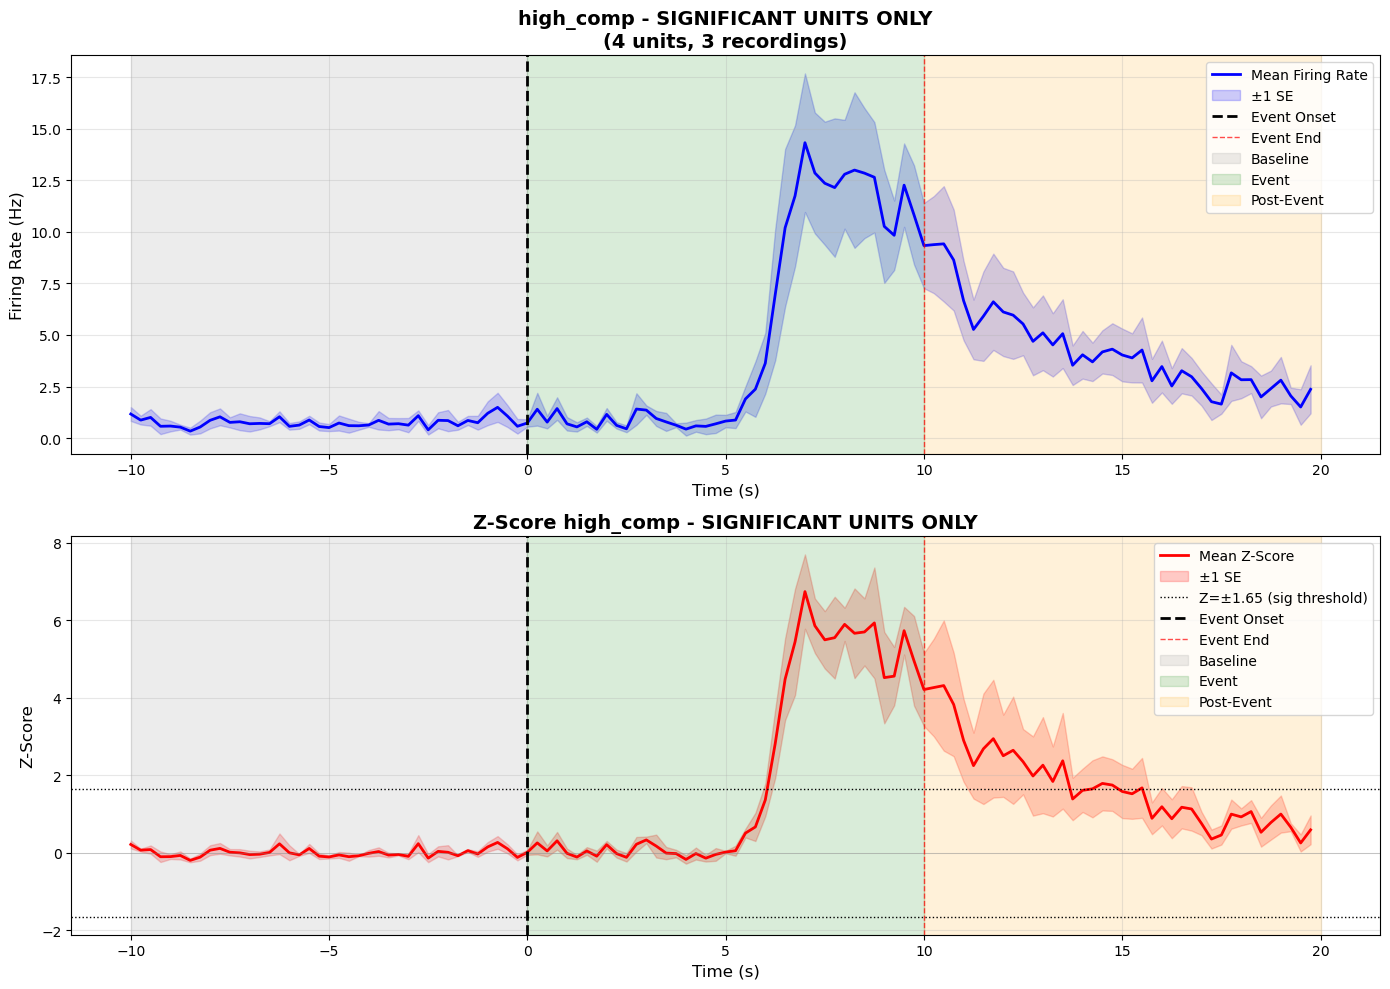


📊 high_comp_lose: 9 significant units across 7 recordings


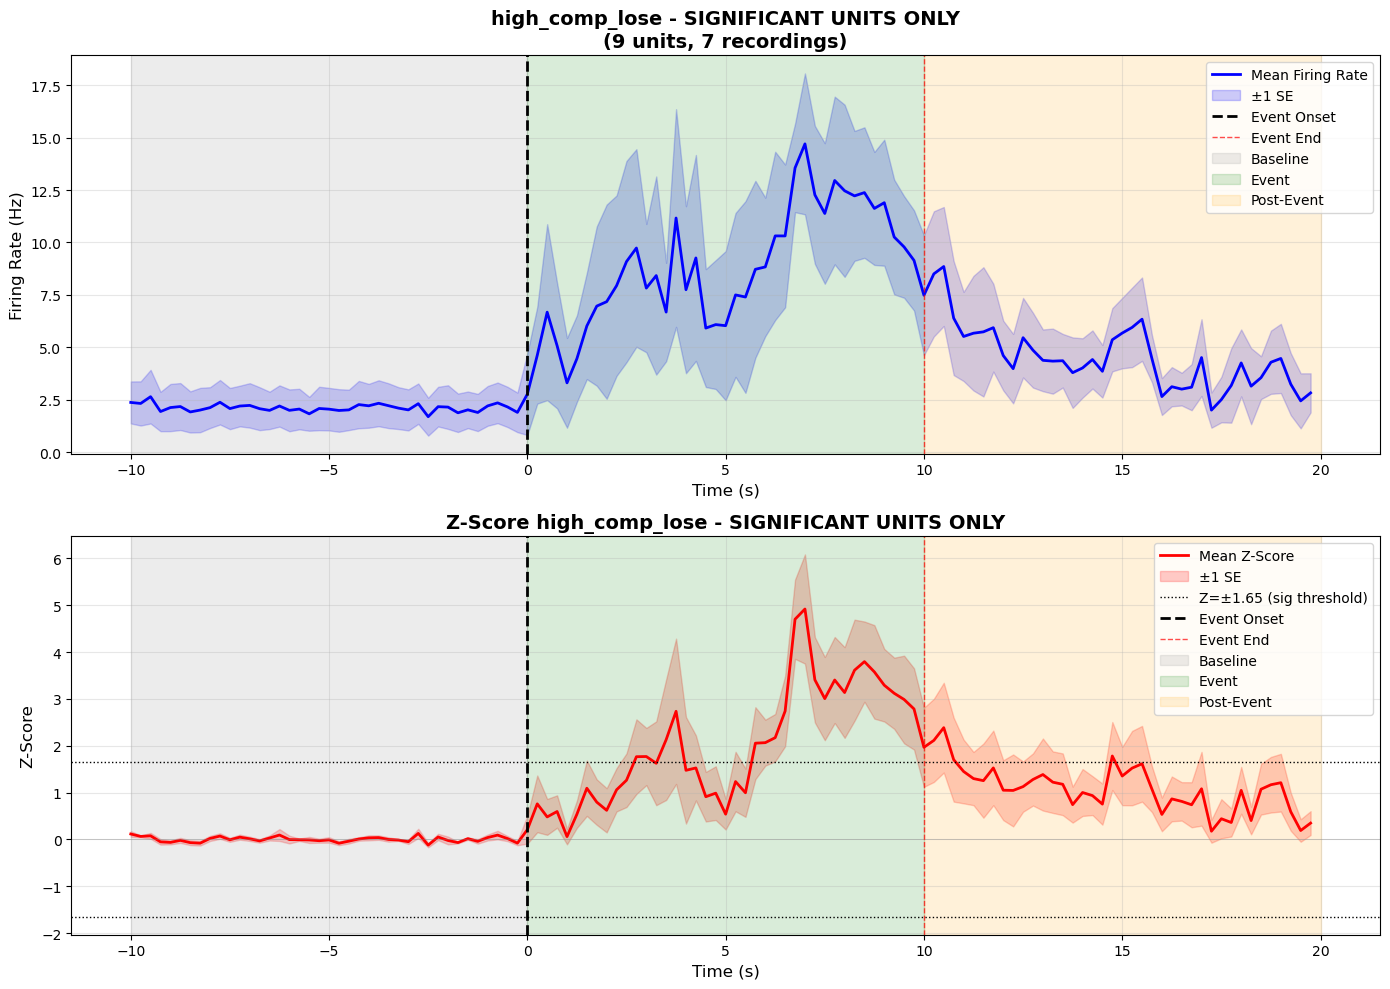


📊 high_comp_tie: 3 significant units across 3 recordings


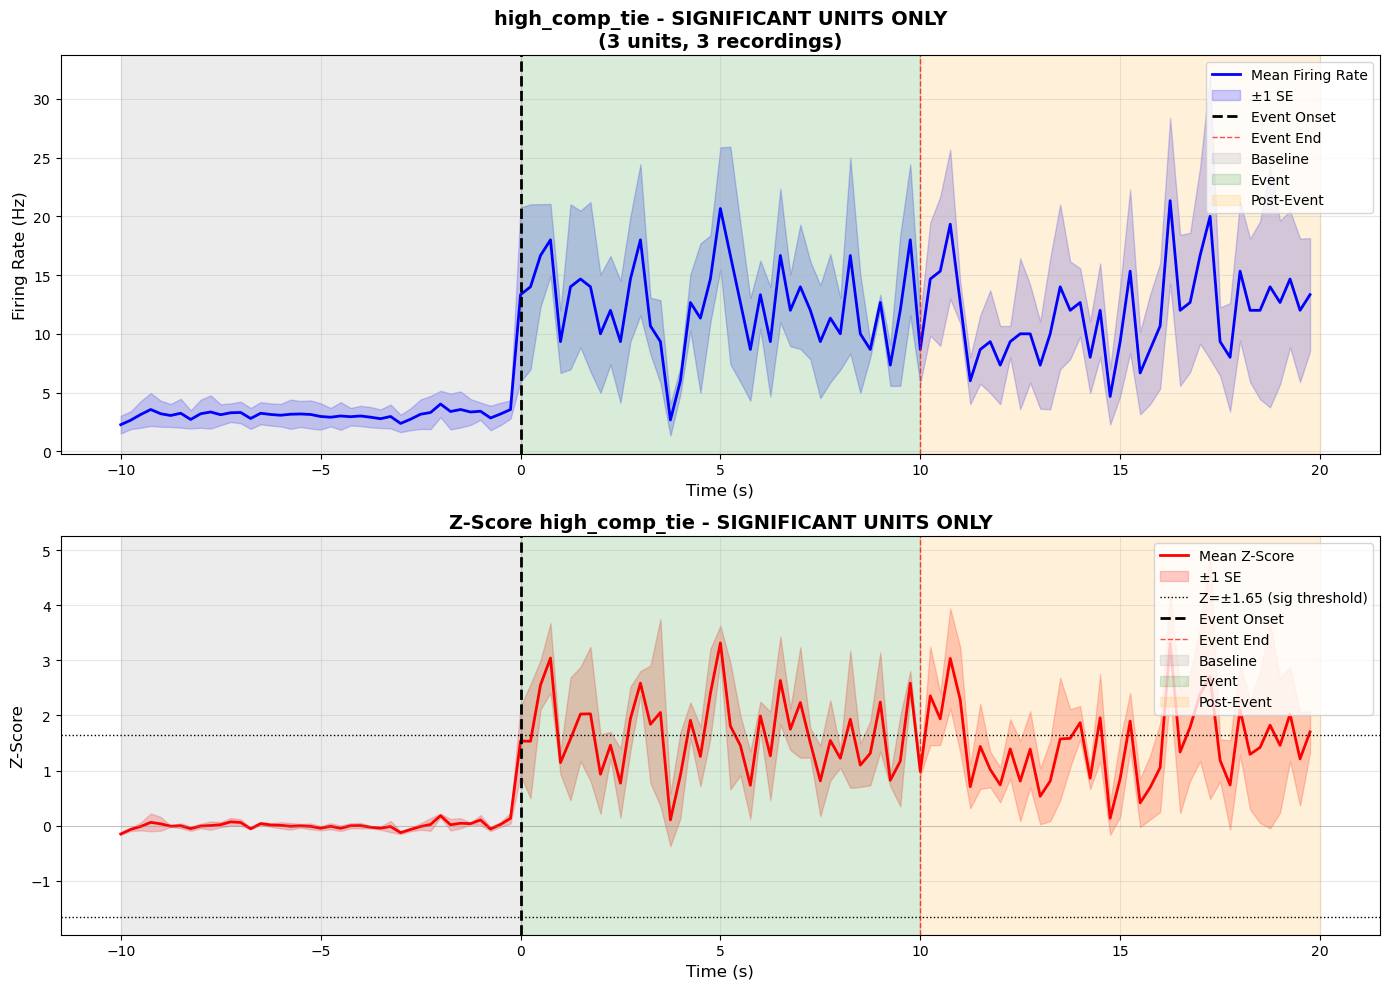


📊 high_comp_win: 7 significant units across 4 recordings


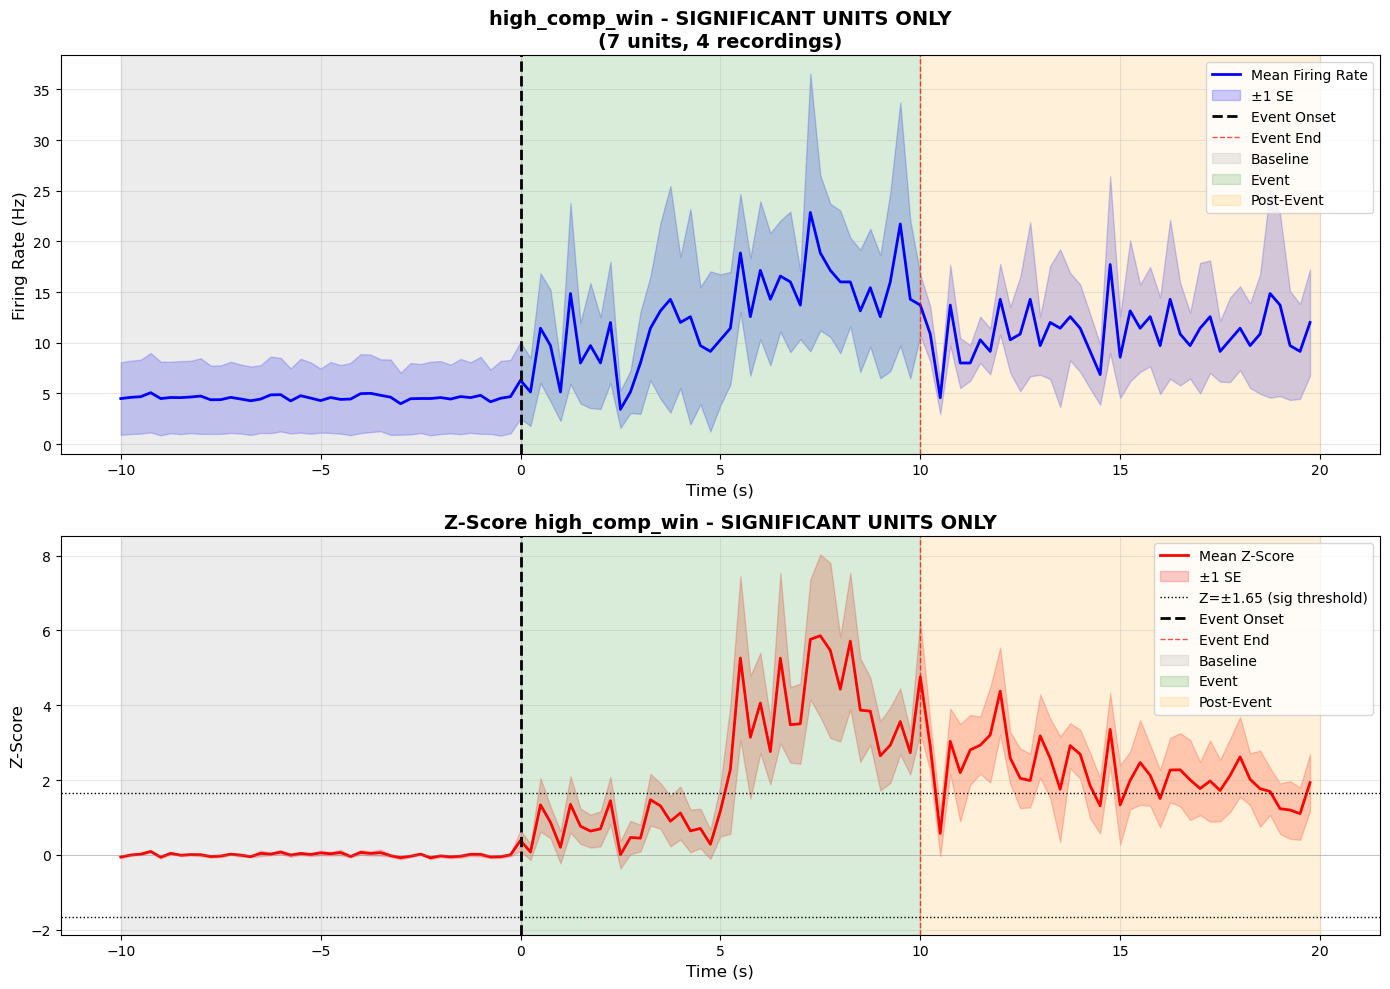


📊 lose: 6 significant units across 5 recordings


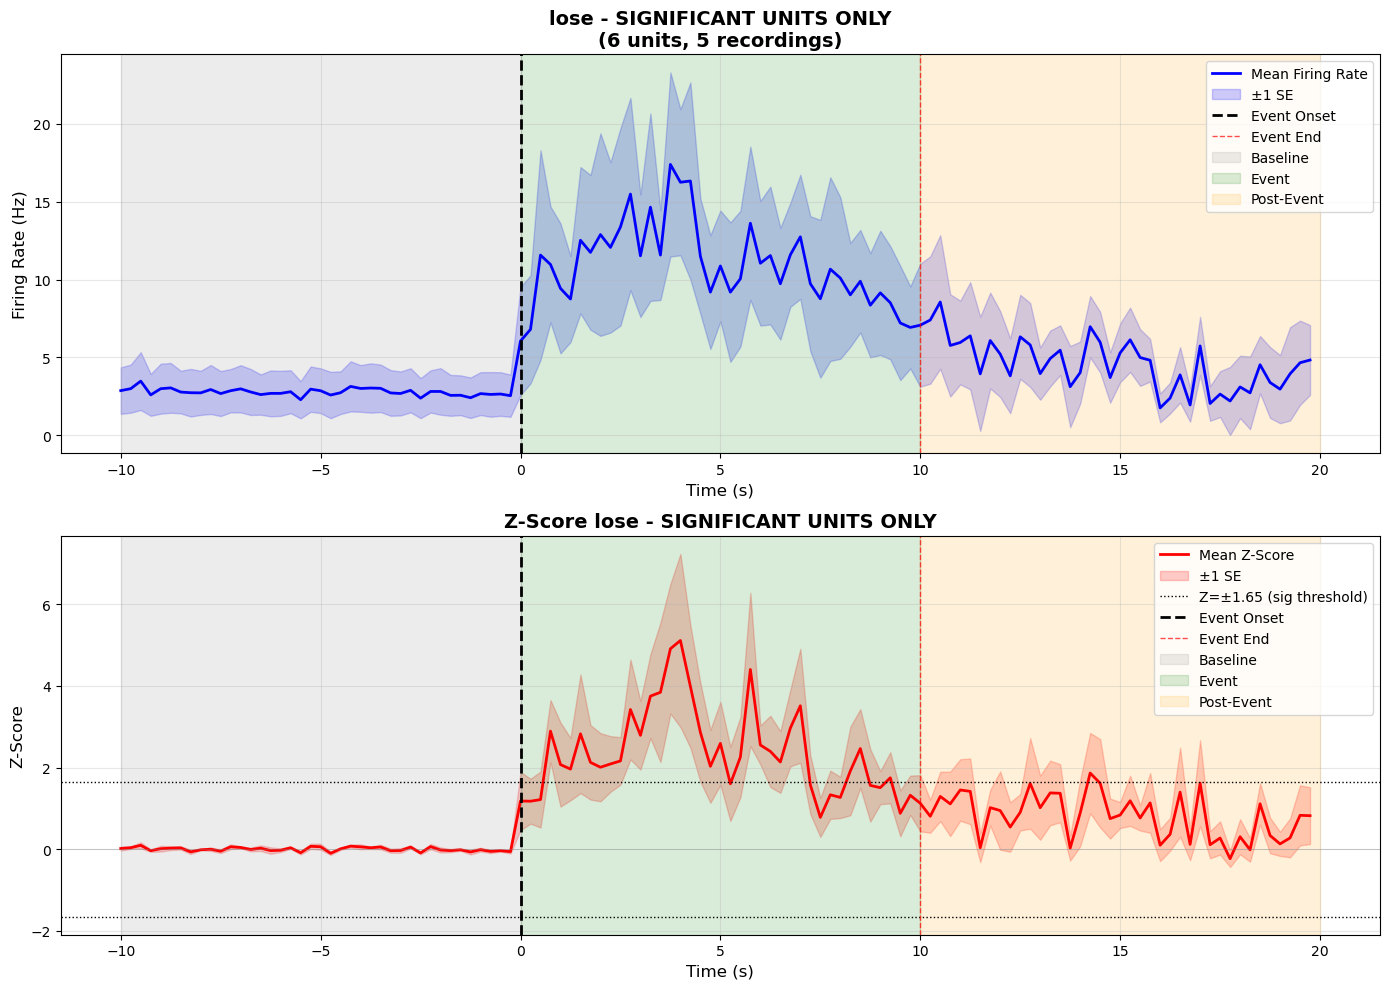


📊 low_comp: 2 significant units across 2 recordings


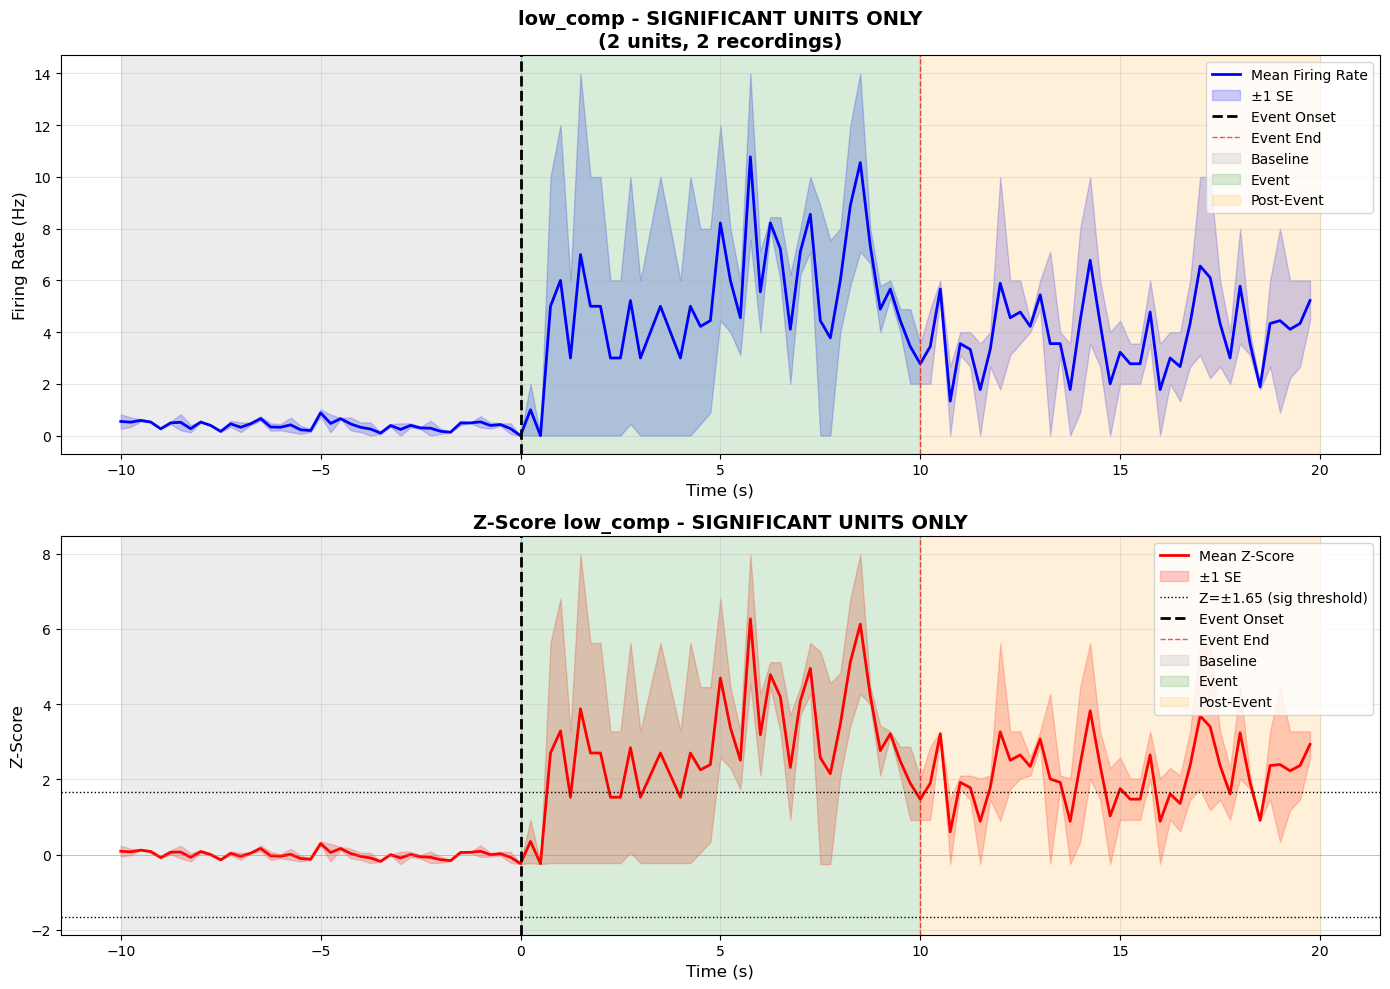


📊 low_comp_lose: 5 significant units across 3 recordings



📊 low_comp_win: 6 significant units across 4 recordings



📊 win: 7 significant units across 4 recordings


In [365]:
# Plot temporal dynamics for SIGNIFICANT UNITS ONLY with extended window
# Exclude baseline events to focus on the main experimental events
exclude_events_for_plotting = [
    'alone_rewarded_baseline', 'high_comp_lose_baseline',
    'high_comp_win_baseline', 'low_comp_lose_baseline',
    'low_comp_win_baseline', 'overall_pretone'
]

print("🎯 PLOTTING TEMPORAL DYNAMICS FOR SIGNIFICANT UNITS")
print("Features:")
print("- Only includes units that are significant for each event")
print("- Extended window: -10s to +15s (5s post-event)")
print("- Excludes baseline/summary events")
print()

plot_temporal_dynamics_significant_units_extended(
    time_dfs=time_dfs_sig_only,
    pre_window=10,
    equalize=10,
    post_window=10,
    exclude_events=exclude_events_for_plotting
)

# Summary: Temporal Dynamics Analysis for Significant Units

## Key Changes Made

### 1. **Significant Units Only**
- **Previous version**: Averaged z-scores across ALL units (significant + non-significant)
- **New version**: Only includes units that were classified as significant for each specific event type
- This gives a cleaner view of the temporal dynamics of neurons that actually respond to each event

### 2. **Extended Time Window**
- **Previous version**: Only showed up to the end of the event (10 seconds)
- **New version**: Extended window includes 5 seconds post-event (total: -10s to +15s)
- This allows you to see recovery dynamics and sustained responses after event termination

### 3. **What the Analysis Shows**

Each plot displays:
- **Firing Rate PSTH**: Raw firing rates averaged across significant units only
- **Z-Score Dynamics**: Normalized activity relative to global baseline, showing statistical significance over time
- **Color-coded regions**: Baseline (gray), Event (green), Post-Event (orange)
- **Significance thresholds**: Horizontal dotted lines at ±1.65 z-score units

### 4. **Key Findings**

From the plots, we can see distinct temporal patterns:

- **`alone_rewarded`**: Clear sustained increase during event with gradual decay post-event
- **`high_comp_win`**: Strong activation during event, maintained somewhat into post-event period  
- **`low_comp_win`**: Gradual buildup during event, sustained elevation post-event
- **`high_comp_lose`**: More variable response, some sustained activity post-event
- **`low_comp_lose`**: Strong activation during event, remains elevated post-event
- **`high_comp_tie`**: Variable response pattern with sustained activity

### 5. **Interpretation**

The 5-second post-event window reveals important information about:
- **Recovery dynamics**: How quickly neural activity returns to baseline
- **Sustained responses**: Whether significant units maintain elevated activity after event termination
- **Event-specific patterns**: Different competition outcomes show distinct temporal signatures

This analysis provides a much cleaner view of the temporal dynamics by focusing only on neurons that are actually responsive to each event type, rather than diluting the signal with non-responsive units.